<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:190%"><b> Table of contents </b></h1>
    
* [**Imports**](#1)
* [**Pre-Processing Dataset**](#2)
* [**EDA**](#3)
* [**Feature selection and Splitting data**](#4)
* [**Modelling Stage**](#5)
    * [**Random Forest**](#5_1)
    * [**LSTM (Keras)**](#5_2)
    * [**Unsupervised Learning AutoEncoder**](#5_3)
    * [**Unsupervised Learning K Means**](#5_4)
    * [**RL Deep Q Learning**](#5_5)



<a id='1'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:80%"> <b>Imports</b>
   

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import ADASYN
import tensorflow as tf


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


<a id='2'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:80%"> <b>Pre-processing Dataset</b>

In [3]:
import pandas as pd

# Define the paths to the CSV files
file_paths = [
    './datasets/InSDN/OVS.csv',
    './datasets/InSDN/Normal_data.csv',
    './datasets/InSDN/metasploitable-2.csv'
]

# Read each CSV file into a DataFrame and store them in a list
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343889 entries, 0 to 343888
Data columns (total 84 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow ID            343889 non-null  object 
 1   Src IP             343889 non-null  object 
 2   Src Port           343889 non-null  int64  
 3   Dst IP             343889 non-null  object 
 4   Dst Port           343889 non-null  int64  
 5   Protocol           343889 non-null  int64  
 6   Timestamp          343889 non-null  object 
 7   Flow Duration      343889 non-null  int64  
 8   Tot Fwd Pkts       343889 non-null  int64  
 9   Tot Bwd Pkts       343889 non-null  int64  
 10  TotLen Fwd Pkts    343889 non-null  float64
 11  TotLen Bwd Pkts    343889 non-null  float64
 12  Fwd Pkt Len Max    343889 non-null  int64  
 13  Fwd Pkt Len Min    343889 non-null  int64  
 14  Fwd Pkt Len Mean   343889 non-null  float64
 15  Fwd Pkt Len Std    343889 non-null  float64
 16  Bw

In [5]:
df.head(10)

Flow ID         Src IP  Src Port      Dst IP  \
0  172.17.0.2-200.175.2.130-80-48856-6  200.175.2.130     48856  172.17.0.2   
1  172.17.0.2-200.175.2.130-80-48856-6  200.175.2.130     48856  172.17.0.2   
2  172.17.0.2-200.175.2.130-80-48858-6  200.175.2.130     48858  172.17.0.2   
3  172.17.0.2-200.175.2.130-80-48858-6  200.175.2.130     48858  172.17.0.2   
4  172.17.0.2-200.175.2.130-80-48860-6  200.175.2.130     48860  172.17.0.2   
5  172.17.0.2-200.175.2.130-80-48860-6  200.175.2.130     48860  172.17.0.2   
6  172.17.0.2-200.175.2.130-80-48862-6  200.175.2.130     48862  172.17.0.2   
7  172.17.0.2-200.175.2.130-80-48862-6  200.175.2.130     48862  172.17.0.2   
8  172.17.0.2-200.175.2.130-80-48864-6  200.175.2.130     48864  172.17.0.2   
9  172.17.0.2-200.175.2.130-80-48864-6  200.175.2.130     48864  172.17.0.2   

   Dst Port  Protocol       Timestamp  Flow Duration  Tot Fwd Pkts  \
0        80         6  12/1/2020 1:14           4045             2   
1        80         6  12/1/2020 1:14            284             1   
2        80         6  12/1/2020 1:14           4302             2   
3        80         6  12/1/2020 1:14             83             1   
4        80         6  12/1/2020 1:14           3760             2   
5        80         6  12/1/2020 1:14             87             1   
6        80         6  12/1/2020 1:14           9459             2   
7        80         6  12/1/2020 1:14            154             1   
8        80         6  12/1/2020 1:14           4582             2   
9        80         6  12/1/2020 1:14            761             1   

   Tot Bwd Pkts  ...  Fwd Seg Size Min  Active Mean  Active Std  Active Max  \
0             5  ...                 0          0.0         0.0         0.0   
1             1  ...                 0          0.0         0.0         0.0   
2             5  ...                 0          0.0         0.0         0.0   
3             1  ...                 0          0.0         0.0         0.0   
4             5  ...                 0          0.0         0.0         0.0   
5             1  ...                 0          0.0         0.0         0.0   
6             5  ...                 0          0.0         0.0         0.0   
7             1  ...                 0          0.0         0.0         0.0   
8             5  ...                 0          0.0         0.0         0.0   
9             1  ...                 0          0.0         0.0         0.0   

   Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  Label  
0         0.0        0.0       0.0       0.0       0.0    BFA  
1         0.0        0.0       0.0       0.0       0.0    BFA  
2         0.0        0.0       0.0       0.0       0.0    BFA  
3         0.0        0.0       0.0       0.0       0.0    BFA  
4         0.0        0.0       0.0       0.0       0.0    BFA  
5         0.0        0.0       0.0       0.0       0.0    BFA  
6         0.0        0.0       0.0       0.0       0.0    BFA  
7         0.0        0.0       0.0       0.0       0.0    BFA  
8         0.0        0.0       0.0       0.0       0.0    BFA  
9         0.0        0.0       0.0       0.0       0.0    BFA  

[10 rows x 84 columns]

In [6]:
df = df.drop_duplicates()


In [7]:
#Check for duplicates and missing values
print(df.duplicated().sum())
print("***")
print(df.isna().sum())

0
***
Flow ID      0
Src IP       0
Src Port     0
Dst IP       0
Dst Port     0
            ..
Idle Mean    0
Idle Std     0
Idle Max     0
Idle Min     0
Label        0
Length: 84, dtype: int64


## Drop zero information features

In [5]:
columns_to_drop = ['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Timestamp']
df = df.drop(columns=columns_to_drop, axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343889 entries, 0 to 343888
Data columns (total 77 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow Duration      343889 non-null  int64  
 1   Tot Fwd Pkts       343889 non-null  int64  
 2   Tot Bwd Pkts       343889 non-null  int64  
 3   TotLen Fwd Pkts    343889 non-null  float64
 4   TotLen Bwd Pkts    343889 non-null  float64
 5   Fwd Pkt Len Max    343889 non-null  int64  
 6   Fwd Pkt Len Min    343889 non-null  int64  
 7   Fwd Pkt Len Mean   343889 non-null  float64
 8   Fwd Pkt Len Std    343889 non-null  float64
 9   Bwd Pkt Len Max    343889 non-null  int64  
 10  Bwd Pkt Len Min    343889 non-null  int64  
 11  Bwd Pkt Len Mean   343889 non-null  float64
 12  Bwd Pkt Len Std    343889 non-null  float64
 13  Flow Byts/s        343889 non-null  float64
 14  Flow Pkts/s        343889 non-null  float64
 15  Flow IAT Mean      343889 non-null  float64
 16  Fl

In [7]:
df["Label"].str.strip()

df["Label"] = df["Label"].replace({'DDoS': 'DDoS'}, regex=True)  # Ensure consistent labeling


In [8]:
# Correct the 'DDoS ' label specifically
df["Label"] = df["Label"].replace('DDoS ', 'DDoS', regex=False)

# Now, check the label distribution again
label_distribution = df["Label"].value_counts()
print(label_distribution)

Label
DDoS          121942
Probe          98129
Normal         68424
DoS            53616
BFA             1405
Web-Attack       192
BOTNET           164
U2R               17
Name: count, dtype: int64


<a id='3'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:80%"> <b>Exploritory Data Analysis</b>

C:\Users\LEGION\AppData\Local\Temp\ipykernel_26500\791687088.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis_r', len(sorted_attack_counts))


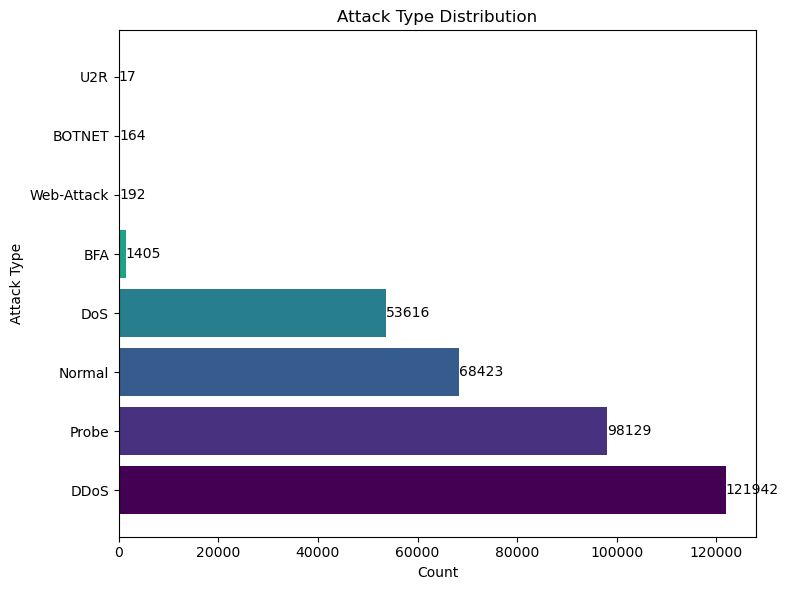

In [12]:
#Distribution of Attacks
attack_counts = df['Label'].value_counts()

# Sort the attack types and counts in descending order
sorted_attack_counts = attack_counts.sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(8, 6))  # Adjust the figsize as desired
# Define a color palette with a gradient effect
colors = plt.cm.get_cmap('viridis_r', len(sorted_attack_counts))

# Create the horizontal bar chart with the customized colors
bars = plt.barh(sorted_attack_counts.index, sorted_attack_counts.values, color=colors(np.arange(len(sorted_attack_counts))))

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.title('Attack Type Distribution')

# Invert the y-axis to display the attack types in descending order
plt.gca().invert_yaxis()

# Add count values inside each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='left', va='center')

# Adjust spacing between bars
plt.tight_layout()

C:\Users\LEGION\anaconda3\envs\TensorFlowGPU\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


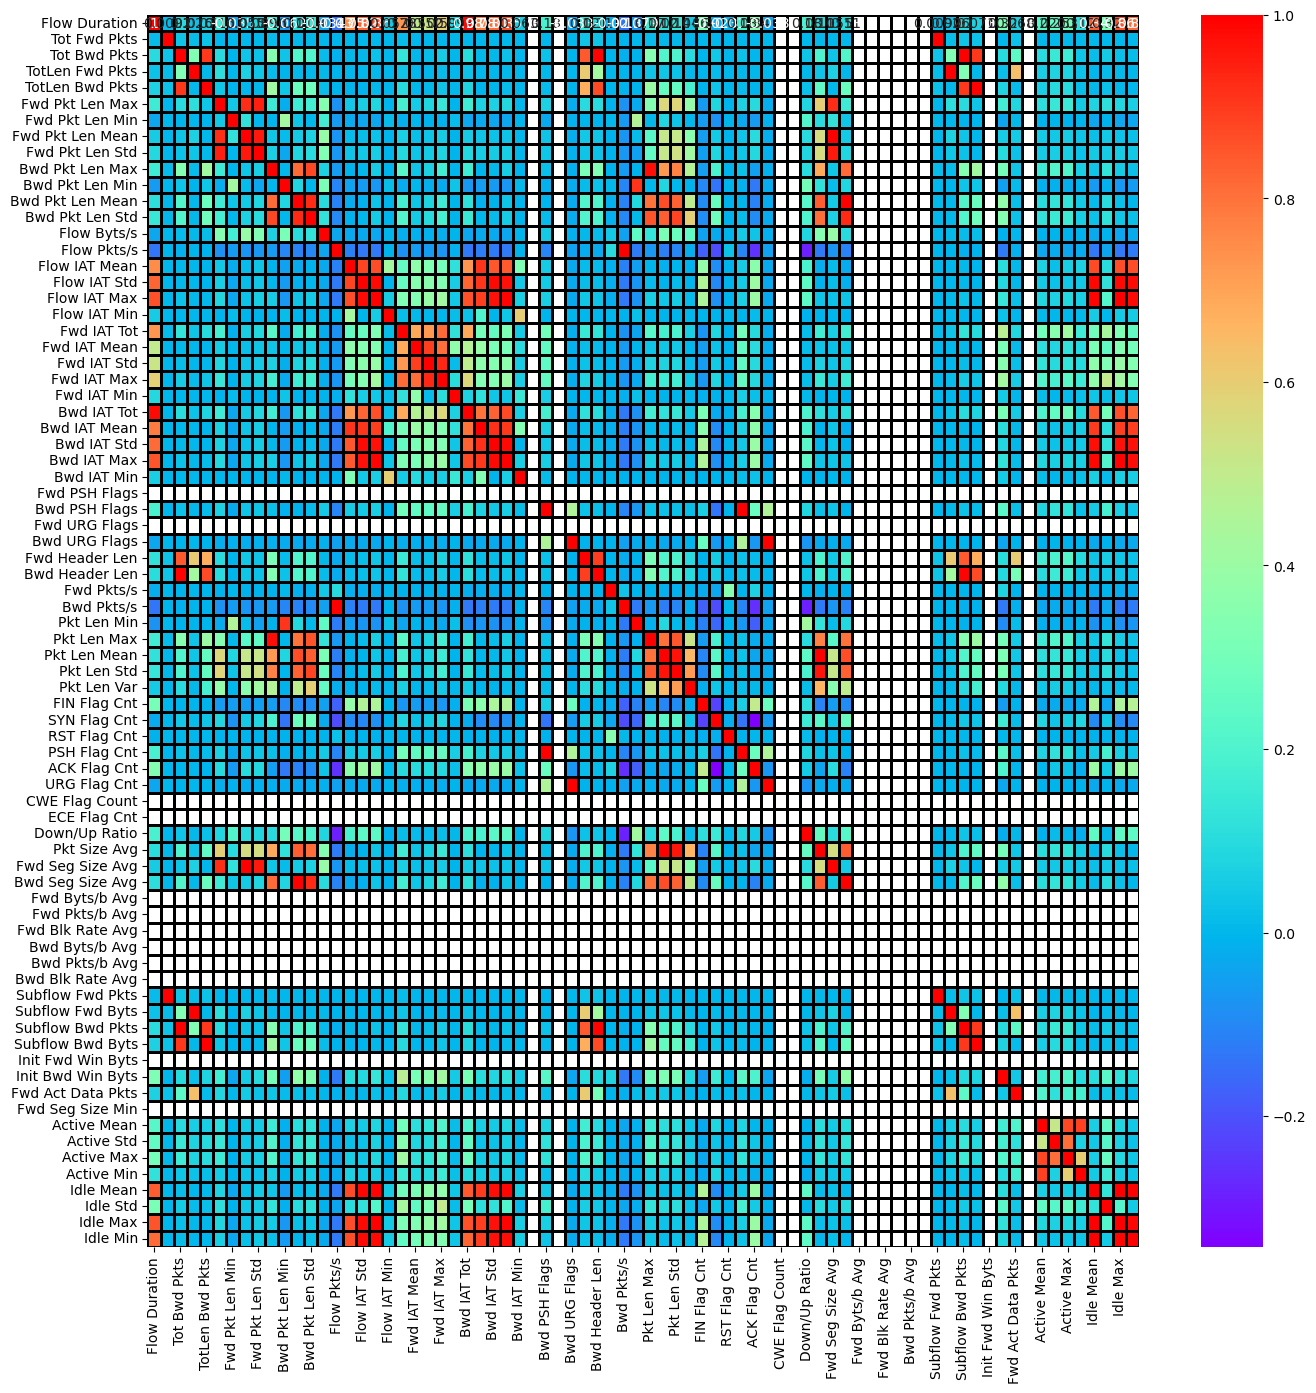

In [13]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Now, you can safely calculate correlation and plot
plt.figure(figsize=(16,16))
sns.heatmap(numeric_df.corr(), annot=True, linecolor='black', linewidths=1, cmap='rainbow')
plt.show()

<a id='4'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:80%"> <b>Feature Extraction and Splitting data</b>

## Drop zero information features

In [9]:
columns_dropped = []  # List to keep track of dropped columns

for column in df.columns:
    if (df[column] == 0).all():
        df.drop(column, axis=1, inplace=True)
        columns_dropped.append(column)

# Print the names of dropped columns
if columns_dropped:
    print("Dropped columns with all values equal to 0:", ", ".join(columns_dropped))
else:
    print("No columns were dropped.")


Dropped columns with all values equal to 0: Fwd PSH Flags, Fwd URG Flags, CWE Flag Count, ECE Flag Cnt, Fwd Byts/b Avg, Fwd Pkts/b Avg, Fwd Blk Rate Avg, Bwd Byts/b Avg, Bwd Pkts/b Avg, Bwd Blk Rate Avg, Fwd Seg Size Min


## Drop features which have the same exact values

In [10]:

# Sample DataFrame creation for demonstration (Optional)
# df = pd.DataFrame({
#     'A': [1, 2, 3, 4],
#     'B': [5, 6, 7, 8],
#     'C': [1, 2, 3, 4],  # Same as 'A'
#     'D': [5, 6, 7, 8],  # Same as 'B'
#     'E': [9, 10, 11, 12]
# })

columns_to_drop = set()

for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
        col1 = df.iloc[:, i]
        col2 = df.iloc[:, j]
        if col1.equals(col2):
            columns_to_drop.add(df.columns[j])

# Drop the identified columns
df.drop(columns=columns_to_drop, inplace=True)

# Print the names of dropped columns
print("Dropped columns with identical values to another column:", ", ".join(columns_to_drop))

Dropped columns with identical values to another column: Subflow Bwd Pkts, URG Flag Cnt, Subflow Fwd Pkts, PSH Flag Cnt, Fwd Seg Size Avg


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343889 entries, 0 to 343888
Data columns (total 61 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow Duration      343889 non-null  int64  
 1   Tot Fwd Pkts       343889 non-null  int64  
 2   Tot Bwd Pkts       343889 non-null  int64  
 3   TotLen Fwd Pkts    343889 non-null  float64
 4   TotLen Bwd Pkts    343889 non-null  float64
 5   Fwd Pkt Len Max    343889 non-null  int64  
 6   Fwd Pkt Len Min    343889 non-null  int64  
 7   Fwd Pkt Len Mean   343889 non-null  float64
 8   Fwd Pkt Len Std    343889 non-null  float64
 9   Bwd Pkt Len Max    343889 non-null  int64  
 10  Bwd Pkt Len Min    343889 non-null  int64  
 11  Bwd Pkt Len Mean   343889 non-null  float64
 12  Bwd Pkt Len Std    343889 non-null  float64
 13  Flow Byts/s        343889 non-null  float64
 14  Flow Pkts/s        343889 non-null  float64
 15  Flow IAT Mean      343889 non-null  float64
 16  Fl

### Drop Label column for feature scaling

In [12]:
dfu = df.drop(columns=['Label'])

In [13]:
dfu.head(3)

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0           4045             2             5            476.0   
1            284             1             1              0.0   
2           4302             2             5            478.0   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0           1803.0              476                0             238.0   
1              0.0                0                0               0.0   
2           1803.0              478                0             239.0   

   Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Init Bwd Win Byts  \
0       336.582828             1803  ...                 59   
1         0.000000                0  ...                 62   
2       337.997041             1803  ...                 59   

   Fwd Act Data Pkts  Active Mean  Active Std  Active Max  Active Min  \
0                  1          0.0         0.0         0.0         0.0   
1                  0          0.0         0.0         0.0         0.0   
2                  1          0.0         0.0         0.0         0.0   

   Idle Mean  Idle Std  Idle Max  Idle Min  
0        0.0       0.0       0.0       0.0  
1        0.0       0.0       0.0       0.0  
2        0.0       0.0       0.0       0.0  

[3 rows x 60 columns]

### Scaling data first

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
df_scaled = pd.DataFrame(scaler.fit_transform(dfu), columns=dfu.columns)


In [15]:
df_scaled.head(3)

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0       0.000035      0.000002      0.000117         0.000015   
1       0.000004      0.000001      0.000000         0.000000   
2       0.000037      0.000002      0.000117         0.000015   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0         0.000017         0.007410              0.0          0.007410   
1         0.000000         0.000000              0.0          0.000000   
2         0.000017         0.007441              0.0          0.007441   

   Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Init Bwd Win Byts  \
0         0.007410         0.028067  ...           0.000916   
1         0.000000         0.000000  ...           0.000961   
2         0.007441         0.028067  ...           0.000916   

   Fwd Act Data Pkts  Active Mean  Active Std  Active Max  Active Min  \
0           0.000089          0.0         0.0         0.0         0.0   
1           0.000000          0.0         0.0         0.0         0.0   
2           0.000089          0.0         0.0         0.0         0.0   

   Idle Mean  Idle Std  Idle Max  Idle Min  
0        0.0       0.0       0.0       0.0  
1        0.0       0.0       0.0       0.0  
2        0.0       0.0       0.0       0.0  

[3 rows x 60 columns]

### Training and Test split
**Also Add attack category Label for prediction** <br>
**Add training set with synthetic samples using BSMOTE for minority samples**

In [16]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df_scaled (features) and df['Label'] (target) are already defined

X = df_scaled
y = df['Label']

# Reset the indexes of X and y to ensure they match
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Identify the majority classes
majority_classes = ['Normal', 'Probe', 'DDoS']
# Create a mask for the majority classes in the training set
majority_mask = y_train.isin(majority_classes)

# Separate the training set into majority and minority classes
X_train_majority = X_train[majority_mask]
y_train_majority = y_train[majority_mask]
X_train_minority = X_train[~majority_mask]
y_train_minority = y_train[~majority_mask]

# Apply BorderlineSMOTE to the minority classes in the training set
bsmote = BorderlineSMOTE(random_state=42, sampling_strategy= 'auto')

X_train_minority_resampled, y_train_minority_resampled = bsmote.fit_resample(X_train_minority, y_train_minority)

# Combine the resampled minority data with the majority class data
X_train_resampled = pd.concat([X_train_majority, X_train_minority_resampled], axis=0)
y_train_resampled = pd.concat([y_train_majority, y_train_minority_resampled], axis=0)


In [17]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in list(
                          locals().items())), key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))



                            df: 177.6 MiB
             X_train_resampled: 163.9 MiB
                           dfu: 157.4 MiB
                     df_scaled: 157.4 MiB
                             X: 157.4 MiB
                       X_train: 112.0 MiB
              X_train_majority: 94.0 MiB
    X_train_minority_resampled: 68.8 MiB
                        X_test: 48.0 MiB
             y_train_resampled: 23.4 MiB


In [18]:
import gc
gc.collect()


0

In [19]:
# Convert the resampled target array to a pandas Series
y_train_resampled_series = pd.Series(y_train_resampled)

# Get the count of each category
attack_distribution = y_train_resampled_series.value_counts()

# Print the distribution
print(attack_distribution)

Label
DDoS          85359
Probe         68690
Normal        47897
DoS           37531
BFA           37531
Web-Attack    37531
U2R           37531
BOTNET          115
Name: count, dtype: int64


### PCA Dimension Reduction

In [35]:
# Assuming X is your feature matrix with 60 features
pca = PCA().fit(X_train)

# Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components for 95% variance
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1

print(f"Number of components to retain 95% variance: {n_components_95}")

Number of components to retain 95% variance: 7


In [36]:
from sklearn.decomposition import PCA

# Initialize PCA for the original data
pca = PCA(n_components=7)  

# Fit PCA on the original training data
pca.fit(X_train)

# Transform both original training and test data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Do the same for the resampled data
# Initialize PCA for the resampled data
pca_resampled = PCA(n_components=7)  

# Fit PCA on the resampled training data
pca_resampled.fit(X_train_resampled)

# Transform both resampled training and original test data using pca_resampled
X_train_pca_resampled = pca_resampled.transform(X_train_resampled)
X_test_pca_resampled = pca_resampled.transform(X_test)

### Autoencoder Dimension Reduction

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import backend as K

# Assuming X_train and X_test are already defined

# Define the size of the input features and the encoding dimension
input_dim = X_train.shape[1]
encoding_dim = 32  # Dimension of the encoding layer

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoding layer (bottleneck)
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoding layer
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Encoder model (for later use in transforming data)
encoder = Model(input_layer, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

# Clear the TensorFlow session to free up memory
K.clear_session()


Epoch 1/25
941/941 [==============================] - 4s 2ms/step - loss: 0.0335 - val_loss: 0.0029
Epoch 2/25
941/941 [==============================] - 2s 2ms/step - loss: 0.0013 - val_loss: 6.6715e-04
Epoch 3/25
941/941 [==============================] - 2s 2ms/step - loss: 5.0965e-04 - val_loss: 3.9057e-04
Epoch 4/25
941/941 [==============================] - 2s 2ms/step - loss: 3.1735e-04 - val_loss: 2.5404e-04
Epoch 5/25
941/941 [==============================] - 2s 2ms/step - loss: 2.2166e-04 - val_loss: 1.9805e-04
Epoch 6/25
941/941 [==============================] - 2s 2ms/step - loss: 1.7757e-04 - val_loss: 1.5542e-04
Epoch 7/25
941/941 [==============================] - 2s 2ms/step - loss: 1.4042e-04 - val_loss: 1.2440e-04
Epoch 8/25
941/941 [==============================] - 2s 2ms/step - loss: 1.1459e-04 - val_loss: 1.0368e-04
Epoch 9/25
941/941 [==============================] - 2s 2ms/step - loss: 1.0153e-04 - val_loss: 9.4809e-05
Epoch 10/25
941/941 [===================

In [38]:
# Function for batch processing during encoding
def batch_encode(encoder_model, data, batch_size=256):
    encoded_data = []
    for i in range(0, len(data), batch_size):
        batch = data[i:i+batch_size]
        encoded_batch = encoder_model.predict(batch)
        encoded_data.append(encoded_batch)
    return np.concatenate(encoded_data, axis=0)

# Transform training and test data using batch processing
X_train_encoded = batch_encode(encoder, X_train)
X_test_encoded = batch_encode(encoder, X_test)


# Now, X_train_encoded and X_test_encoded can be used for training and testing the model respectively

8/8 [==============================] - 0s 720us/step


### Autoencoder Dimension Reduction with BSMOTE

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import backend as K

# Assuming X_train and X_test are already defined

# Define the size of the input features and the encoding dimension
input_dim = X_train_resampled.shape[1]
encoding_dim = 32  # Dimension of the encoding layer

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoding layer (bottleneck)
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoding layer
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Encoder model (for later use in transforming data)
encoder = Model(input_layer, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train_resampled, X_train_resampled,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

# Clear the TensorFlow session to free up memory
K.clear_session()

Epoch 1/25
1376/1376 [==============================] - 4s 3ms/step - loss: 0.0233 - val_loss: 0.0031
Epoch 2/25
1376/1376 [==============================] - 4s 3ms/step - loss: 9.4739e-04 - val_loss: 7.5352e-04
Epoch 3/25
1376/1376 [==============================] - 4s 3ms/step - loss: 4.0391e-04 - val_loss: 3.4978e-04
Epoch 4/25
1376/1376 [==============================] - 3s 2ms/step - loss: 2.1580e-04 - val_loss: 2.7480e-04
Epoch 5/25
1376/1376 [==============================] - 3s 2ms/step - loss: 1.7274e-04 - val_loss: 1.9365e-04
Epoch 6/25
1376/1376 [==============================] - 4s 3ms/step - loss: 1.1219e-04 - val_loss: 1.3484e-04
Epoch 7/25
1376/1376 [==============================] - 3s 2ms/step - loss: 8.8548e-05 - val_loss: 1.1474e-04
Epoch 8/25
1376/1376 [==============================] - 3s 2ms/step - loss: 6.9740e-05 - val_loss: 8.4991e-05
Epoch 9/25
1376/1376 [==============================] - 3s 2ms/step - loss: 5.8121e-05 - val_loss: 7.0729e-05
Epoch 10/25
1376/1

In [33]:
# Function for batch processing during encoding
def batch_encode(encoder_model, data, batch_size=256):
    encoded_data = []
    for i in range(0, len(data), batch_size):
        batch = data[i:i+batch_size]
        encoded_batch = encoder_model.predict(batch)
        encoded_data.append(encoded_batch)
    return np.concatenate(encoded_data, axis=0)

# Transform training and test data using batch processing
X_train_encoded_resampled = batch_encode(encoder, X_train_resampled)
X_test_encoded_resampled = batch_encode(encoder, X_test)


# Now, X_train_encoded and X_test_encoded can be used for training and testing the model respectively

8/8 [==============================] - 0s 857us/step


<a id='5'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:80%"> <b>Modelling and Evaluation</b>

<a id='5_1'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:70%"> <b>Random Forest</b>

### No feature extraction, just scaling

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_report1 = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report1)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9988659164267644

Classification Report:
               precision    recall  f1-score   support

         BFA       0.99      0.83      0.90       421
      BOTNET       0.92      0.98      0.95        49
        DDoS       1.00      1.00      1.00     36583
         DoS       1.00      1.00      1.00     16085
      Normal       1.00      1.00      1.00     20527
       Probe       1.00      1.00      1.00     29439
         U2R       0.50      0.40      0.44         5
  Web-Attack       0.91      0.83      0.86        58

    accuracy                           1.00    103167
   macro avg       0.91      0.88      0.90    103167
weighted avg       1.00      1.00      1.00    103167


Confusion Matrix:
 [[  350     2     0     0     0    67     2     0]
 [    0    48     0     1     0     0     0     0]
 [    0     0 36580     0     3     0     0     0]
 [    0     2     0 16071     3     5     0     4]
 [    1     0     0     3 20523     0     0     0]
 [    3     0     0 

### With PCA Dimension Reduction

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest classifier
rf_classifier1 = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier1.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = rf_classifier1.predict(X_test_pca)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_report1 = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report1)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9977124468095419

Classification Report:
               precision    recall  f1-score   support

         BFA       0.91      0.75      0.82       421
      BOTNET       0.96      1.00      0.98        49
        DDoS       1.00      1.00      1.00     36583
         DoS       1.00      1.00      1.00     16085
      Normal       1.00      1.00      1.00     20527
       Probe       1.00      1.00      1.00     29439
         U2R       0.75      0.60      0.67         5
  Web-Attack       0.92      0.97      0.94        58

    accuracy                           1.00    103167
   macro avg       0.94      0.91      0.93    103167
weighted avg       1.00      1.00      1.00    103167


Confusion Matrix:
 [[  315     2     0    25     1    77     1     0]
 [    0    49     0     0     0     0     0     0]
 [    0     0 36573     0     9     1     0     0]
 [    1     0     1 16041    12    27     0     3]
 [    1     0     3    20 20499     3     0     1]
 [   30     0     4 

### With Autoencoder Dimension Reduction

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest classifier
rf_classifier2 = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier2.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = rf_classifier2.predict(X_test_encoded)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_report1 = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report1)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9984588095030388

Classification Report:
               precision    recall  f1-score   support

         BFA       0.92      0.83      0.87       421
      BOTNET       0.96      1.00      0.98        49
        DDoS       1.00      1.00      1.00     36583
         DoS       1.00      1.00      1.00     16085
      Normal       1.00      1.00      1.00     20527
       Probe       1.00      1.00      1.00     29439
         U2R       0.75      0.60      0.67         5
  Web-Attack       0.91      0.84      0.88        58

    accuracy                           1.00    103167
   macro avg       0.94      0.91      0.92    103167
weighted avg       1.00      1.00      1.00    103167


Confusion Matrix:
 [[  351     2     0     2     0    65     1     0]
 [    0    49     0     0     0     0     0     0]
 [    0     0 36577     0     4     2     0     0]
 [    0     0     1 16066     8     6     0     4]
 [    0     0     0     9 20517     1     0     0]
 [   31     0     1 

### Autoencoder Dimension Reduction with BSMOTE

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest classifier
rf_classifier123 = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier123.fit(X_train_encoded_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_classifier123.predict(X_test_encoded_resampled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_report1 = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report1)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9984103443930714

Classification Report:
               precision    recall  f1-score   support

         BFA       0.90      0.83      0.87       421
      BOTNET       0.96      1.00      0.98        49
        DDoS       1.00      1.00      1.00     36583
         DoS       1.00      1.00      1.00     16085
      Normal       1.00      1.00      1.00     20527
       Probe       1.00      1.00      1.00     29439
         U2R       1.00      0.60      0.75         5
  Web-Attack       0.95      0.95      0.95        58

    accuracy                           1.00    103167
   macro avg       0.98      0.92      0.94    103167
weighted avg       1.00      1.00      1.00    103167


Confusion Matrix:
 [[  351     2     0     1     1    66     0     0]
 [    0    49     0     0     0     0     0     0]
 [    0     0 36576     1     4     2     0     0]
 [    0     0     0 16067     8     7     0     3]
 [    0     0     0    12 20514     1     0     0]
 [   39     0     2 

### PCA Dimension Reduction with BSMOTE

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest classifier
rf_classifier12 = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier12.fit(X_train_pca_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_classifier12.predict(X_test_pca_resampled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_report1 = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report1)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9976445956555875

Classification Report:
               precision    recall  f1-score   support

         BFA       0.85      0.76      0.80       421
      BOTNET       0.96      1.00      0.98        49
        DDoS       1.00      1.00      1.00     36583
         DoS       1.00      1.00      1.00     16085
      Normal       1.00      1.00      1.00     20527
       Probe       1.00      1.00      1.00     29439
         U2R       0.75      0.60      0.67         5
  Web-Attack       0.90      0.93      0.92        58

    accuracy                           1.00    103167
   macro avg       0.93      0.91      0.92    103167
weighted avg       1.00      1.00      1.00    103167


Confusion Matrix:
 [[  322     2     0    18     1    77     1     0]
 [    0    49     0     0     0     0     0     0]
 [    0     0 36574     0     8     1     0     0]
 [   41     0     1 16008    16    15     0     4]
 [    0     0     3    14 20505     4     0     1]
 [   15     0     6 

<a id='5_2'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:70%"> <b>LSTM</b>

## No feature extraction, just scaling

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Assuming your data is already scaled and suitable for LSTM
# Reshape input data to be 3D [samples, timesteps, features]
#let's assume 1 timestep and all features as different time points
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Design the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.003), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train_encoded, epochs=25, batch_size=256, validation_data=(X_test_reshaped, y_test_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print("Test Accuracy:", accuracy)

Epoch 1/25
941/941 [==============================] - 6s 6ms/step - loss: 0.2216 - accuracy: 0.9344 - val_loss: 0.0993 - val_accuracy: 0.9636
Epoch 2/25
941/941 [==============================] - 5s 5ms/step - loss: 0.0901 - accuracy: 0.9711 - val_loss: 0.0813 - val_accuracy: 0.9761
Epoch 3/25
941/941 [==============================] - 5s 5ms/step - loss: 0.0773 - accuracy: 0.9753 - val_loss: 0.0673 - val_accuracy: 0.9784
Epoch 4/25
941/941 [==============================] - 5s 5ms/step - loss: 0.0682 - accuracy: 0.9777 - val_loss: 0.0598 - val_accuracy: 0.9814
Epoch 5/25
941/941 [==============================] - 5s 5ms/step - loss: 0.0628 - accuracy: 0.9792 - val_loss: 0.0570 - val_accuracy: 0.9820
Epoch 6/25
941/941 [==============================] - 5s 5ms/step - loss: 0.0594 - accuracy: 0.9802 - val_loss: 0.0534 - val_accuracy: 0.9819
Epoch 7/25
941/941 [==============================] - 5s 5ms/step - loss: 0.0569 - accuracy: 0.9810 - val_loss: 0.0506 - val_accuracy: 0.9827
Epoch 

Text(0.5, 1.0, 'Accuracy over iterations')

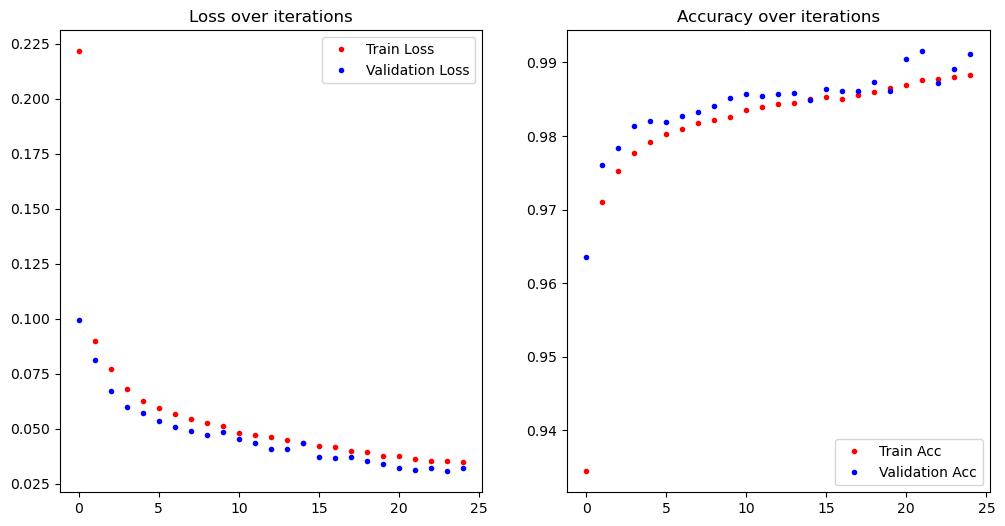

In [47]:
n = len(history.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (history.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (history.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (history.history["accuracy"]),'r.', label="Train Acc")
ax.plot(range(n), (history.history["val_accuracy"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

## With PCA Dimension Reduction

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Assuming your data is already scaled and suitable for LSTM
# Reshape input data to be 3D [samples, timesteps, features]
#let's assume 1 timestep and all features as different time points
X_train_reshaped = X_train_pca.reshape((X_train_pca.shape[0], 1, X_train_pca.shape[1]))
X_test_reshaped = X_test_pca.reshape((X_test_pca.shape[0], 1, X_test_pca.shape[1]))

# Design the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train_pca.shape[1])))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.003), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train_encoded, epochs=25, batch_size=256, validation_data=(X_test_reshaped, y_test_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print("Test Accuracy:", accuracy)

Epoch 1/25
941/941 [==============================] - 6s 6ms/step - loss: 0.3559 - accuracy: 0.8897 - val_loss: 0.1825 - val_accuracy: 0.9397
Epoch 2/25
941/941 [==============================] - 5s 5ms/step - loss: 0.1788 - accuracy: 0.9385 - val_loss: 0.1570 - val_accuracy: 0.9432
Epoch 3/25
941/941 [==============================] - 5s 5ms/step - loss: 0.1596 - accuracy: 0.9447 - val_loss: 0.1475 - val_accuracy: 0.9518
Epoch 4/25
941/941 [==============================] - 5s 5ms/step - loss: 0.1450 - accuracy: 0.9488 - val_loss: 0.1285 - val_accuracy: 0.9528
Epoch 5/25
941/941 [==============================] - 5s 5ms/step - loss: 0.1334 - accuracy: 0.9529 - val_loss: 0.1197 - val_accuracy: 0.9517
Epoch 6/25
941/941 [==============================] - 5s 5ms/step - loss: 0.1253 - accuracy: 0.9573 - val_loss: 0.1094 - val_accuracy: 0.9673
Epoch 7/25
941/941 [==============================] - 5s 5ms/step - loss: 0.1170 - accuracy: 0.9614 - val_loss: 0.0994 - val_accuracy: 0.9715
Epoch 

Text(0.5, 1.0, 'Accuracy over iterations')

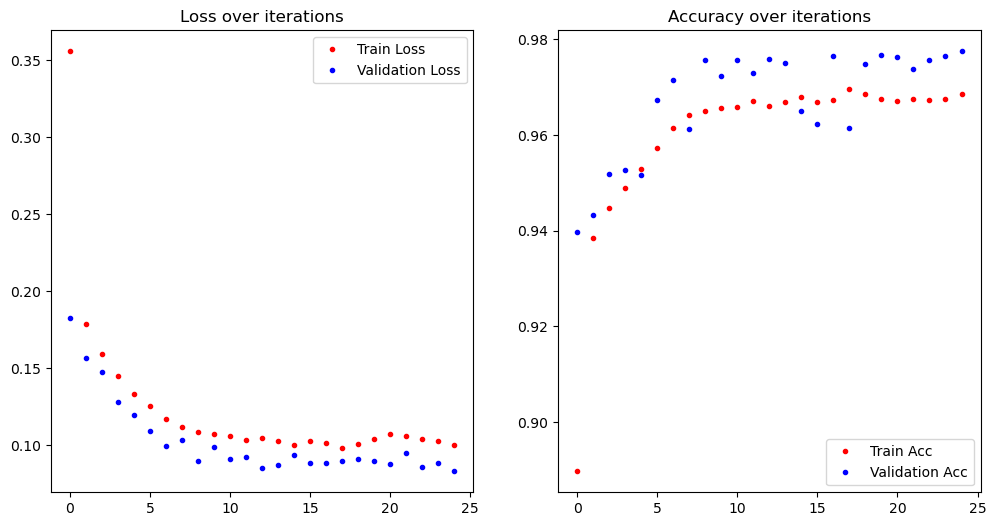

In [49]:
n = len(history.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (history.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (history.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (history.history["accuracy"]),'r.', label="Train Acc")
ax.plot(range(n), (history.history["val_accuracy"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

## With Autoencoder dimension reduction

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Assuming your data is already scaled and suitable for LSTM
# Reshape input data to be 3D [samples, timesteps, features]
#let's assume 1 timestep and all features as different time points
X_train_reshaped = X_train_encoded.reshape((X_train_encoded.shape[0], 1, X_train_encoded.shape[1]))
X_test_reshaped = X_test_encoded.reshape((X_test_encoded.shape[0], 1, X_test_encoded.shape[1]))

# Design the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train_encoded.shape[1])))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.003), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train_encoded, epochs=25, batch_size=256, validation_data=(X_test_reshaped, y_test_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print("Test Accuracy:", accuracy)

Epoch 1/25
941/941 [==============================] - 6s 6ms/step - loss: 0.2025 - accuracy: 0.9318 - val_loss: 0.1178 - val_accuracy: 0.9534
Epoch 2/25
941/941 [==============================] - 5s 5ms/step - loss: 0.1220 - accuracy: 0.9551 - val_loss: 0.1270 - val_accuracy: 0.9537
Epoch 3/25
941/941 [==============================] - 5s 5ms/step - loss: 0.1144 - accuracy: 0.9567 - val_loss: 0.1044 - val_accuracy: 0.9644
Epoch 4/25
941/941 [==============================] - 5s 5ms/step - loss: 0.1116 - accuracy: 0.9565 - val_loss: 0.0992 - val_accuracy: 0.9565
Epoch 5/25
941/941 [==============================] - 5s 5ms/step - loss: 0.1065 - accuracy: 0.9582 - val_loss: 0.1026 - val_accuracy: 0.9717
Epoch 6/25
941/941 [==============================] - 5s 5ms/step - loss: 0.1040 - accuracy: 0.9585 - val_loss: 0.0936 - val_accuracy: 0.9646
Epoch 7/25
941/941 [==============================] - 5s 5ms/step - loss: 0.1021 - accuracy: 0.9589 - val_loss: 0.1005 - val_accuracy: 0.9770
Epoch 

Text(0.5, 1.0, 'Accuracy over iterations')

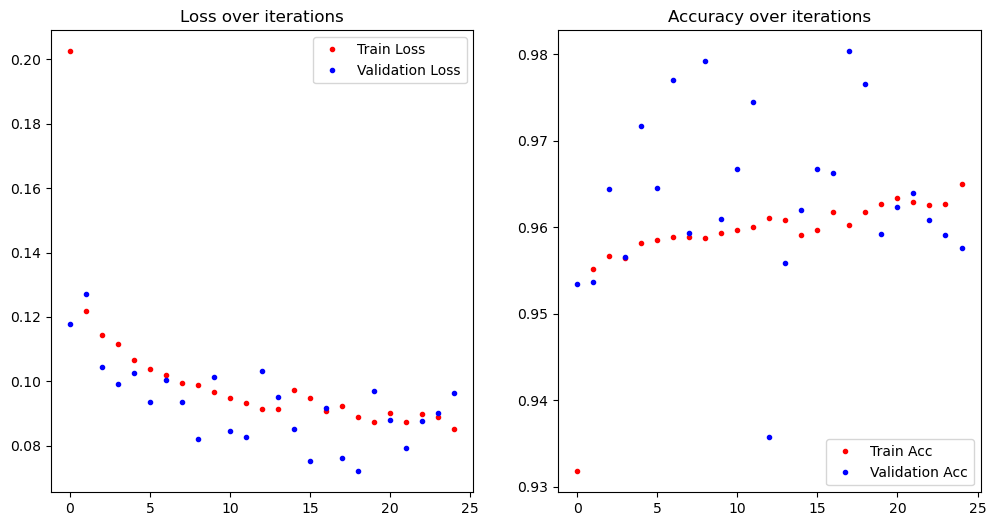

In [51]:
n = len(history.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (history.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (history.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (history.history["accuracy"]),'r.', label="Train Acc")
ax.plot(range(n), (history.history["val_accuracy"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

<a id='5_3'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:70%"> <b>Unsupervised Autoencoder</b>

### Splitting Data for Autoencoder

In [54]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df_scaled and df_experiment['Label'] are already defined
# Reset the index of df_scaled and df to ensure they align
df_scaled = df_scaled.reset_index(drop=True)
df = df.reset_index(drop=True)

# Separate normal and anomalous data
normal_data = df_scaled[df['Label'] == 'Normal']
anomalous_data = df_scaled[df['Label'] != 'Normal']

# Option reduce normal and anomalous data size (currently not)
normal_data_reduced = normal_data.sample(frac=1, random_state=42)
anomalous_data_reduced = anomalous_data.sample(frac=1, random_state=42)

# Delete the original datasets to free up memory
del normal_data, anomalous_data

# Split the normal data into training and test sets
X_train_normal, X_test_normal = train_test_split(normal_data_reduced, test_size=0.3, random_state=42)

# Split the anomalous data into test set (no training data needed for anomalies)
_, X_test_anomalies = train_test_split(anomalous_data_reduced, test_size=0.3, random_state=42)

# Delete the reduced datasets as they are no longer needed
del normal_data_reduced, anomalous_data_reduced

### Model

In [55]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Define the autoencoder architecture
input_dim = X_train_normal.shape[1]
encoding_dim = 32  # This is a hyperparameter and can be tuned

# Encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoder = Dense(input_dim, activation='sigmoid')(encoder)

# Autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train_normal, X_train_normal,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_normal, X_test_normal))

Epoch 1/50
188/188 [==============================] - 1s 4ms/step - loss: 0.1172 - val_loss: 0.0296
Epoch 2/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0166 - val_loss: 0.0097
Epoch 3/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0067 - val_loss: 0.0048
Epoch 4/50
188/188 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.0036
Epoch 5/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 6/50
188/188 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 7/50
188/188 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 8/50
188/188 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/50
188/188 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/50
188/188 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0010

In [56]:
# Function to calculate reconstruction error
def calculate_reconstruction_error(data):
    predictions = autoencoder.predict(data)
    reconstruction_error = np.mean(np.power(data - predictions, 2), axis=1)
    return reconstruction_error

# Calculate reconstruction error for both normal and anomalous test data
error_normal = calculate_reconstruction_error(X_test_normal)
error_anomalies = calculate_reconstruction_error(X_test_anomalies)

2583/2583 [==============================] - 2s 717us/step


In [119]:
# Determine a threshold for anomaly detection
threshold = np.percentile(error_normal, 70.335)  # Optimal is between 70 and 71

# Classify as anomalies or normal based on the threshold
is_anomaly_normal = error_normal > threshold
is_anomaly_anomalous = error_anomalies > threshold

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Assuming true labels are 0 for normal and 1 for anomalies
y_true = np.concatenate([np.zeros(len(X_test_normal)), np.ones(len(X_test_anomalies))])
y_pred = np.concatenate([is_anomaly_normal.astype(int), is_anomaly_anomalous.astype(int)])

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_true, y_pred))

Accuracy: 0.937780491823936
              precision    recall  f1-score   support

         0.0       0.98      0.70      0.82     20527
         1.0       0.93      1.00      0.96     82640

    accuracy                           0.94    103167
   macro avg       0.95      0.85      0.89    103167
weighted avg       0.94      0.94      0.93    103167



<a id='5_4'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:70%"> <b>Unsupervised Learning K Means</b>

In [133]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report, confusion_matrix

# Assuming df_scaled is your scaled feature set

# Initialize K-Means
kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust n_clusters based on domain knowledge or experimentation
kmeans.fit(df_scaled)

# Calculate distances to the nearest cluster center
distances = np.min(cdist(df_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)

# Determine the threshold for anomalies
threshold = np.percentile(distances, 32)  # This can be tuned

# Detect anomalies (points with distances above the threshold)
anomalies_kmeans = distances > threshold

# True labels (0 for 'Normal' and 1 for others)
true_labels = df['Label'].apply(lambda x: 0 if x == 'Normal' else 1).values

# Calculate accuracy
accuracy_kmeans = accuracy_score(true_labels, anomalies_kmeans)
print("Accuracy:", accuracy_kmeans)

# Print the classification report for precision, recall, and F1-score
print(classification_report(true_labels, anomalies_kmeans))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(true_labels, anomalies_kmeans))

C:\Users\LEGION\anaconda3\envs\TensorFlowGPU\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy: 0.6425783976178291
              precision    recall  f1-score   support

           0       0.25      0.41      0.31     68423
           1       0.83      0.70      0.76    275465

    accuracy                           0.64    343888
   macro avg       0.54      0.55      0.53    343888
weighted avg       0.71      0.64      0.67    343888

Confusion Matrix:
[[ 27777  40646]
 [ 82267 193198]]


<a id='5_5'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:70%"> <b>Deep Q Learning</b>

In [20]:
import tensorflow as tf
import numpy as np
import gym
from gym import spaces
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from collections import deque
import random


# Custom environment for the classification task
class ClassificationEnv(gym.Env):
    def __init__(self, X_train, y_train, n_actions):
        super(ClassificationEnv, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.n_actions = n_actions
        self.n_features = X_train.shape[1]
        
        # Define action and observation space
        self.action_space = spaces.Discrete(self.n_actions)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.n_features,), dtype=np.float32)
    
    def reset(self):
        # Reset the state to a random sample from the dataset
        self.current_index = np.random.randint(0, len(self.X_train))
        self.current_state = self.X_train[self.current_index]
        return self.current_state
    
    def step(self, action):
        # Check if the action is correct
        correct_action = self.y_train[self.current_index]
        reward = 1 if action == correct_action else 0
        done = True  # Each step is a new episode in this case
        
        # Select a new random state for the next step
        self.current_index = np.random.randint(0, len(self.X_train))
        self.current_state = self.X_train[self.current_index]
        
        return self.current_state, reward, done, {}

In [21]:
import tensorflow as tf

# Define the DQN model
def build_model(input_shape, n_actions):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(128, activation='relu'),
        Dense(n_actions, activation='linear')  # No activation in the last layer
    ])
    model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse')
    return model

In [22]:
# Experience Replay Buffer
class ReplayBuffer:
    def __init__(self, max_size):
        self.buffer = deque(maxlen=max_size)
    
    def add(self, experience):
        self.buffer.append(experience)
    
    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)

In [45]:
# Main DQL training loop
def train_dql(env, episodes=2500, batch_size=256, gamma=0.001, epsilon=0.975, epsilon_min=0.01, epsilon_decay=0.998):
    input_shape = env.observation_space.shape[0]
    n_actions = env.action_space.n
    model = build_model(input_shape, n_actions)
    replay_buffer = ReplayBuffer(max_size=10000)
    
    for episode in range(episodes):
        state = env.reset()
        state = np.reshape(state, [1, input_shape])
        done = False
        total_reward = 0
        
        while not done:
            if np.random.rand() <= epsilon:
                action = env.action_space.sample()  # Explore
            else:
                q_values = model.predict(state)
                action = np.argmax(q_values[0])  # Exploit
                
            next_state, reward, done, _ = env.step(action)
            next_state = np.reshape(next_state, [1, input_shape])
            
            replay_buffer.add((state, action, reward, next_state, done))
            state = next_state
            total_reward += reward
            
            if len(replay_buffer.buffer) > batch_size:
                minibatch = replay_buffer.sample(batch_size)
                states = np.array([i[0] for i in minibatch]).reshape(batch_size, input_shape)
                actions = np.array([i[1] for i in minibatch])
                rewards = np.array([i[2] for i in minibatch])
                next_states = np.array([i[3] for i in minibatch]).reshape(batch_size, input_shape)
                dones = np.array([i[4] for i in minibatch])
                
                # Predict the Q-values for the next states
                next_q_values = model.predict_on_batch(next_states)
                # Compute the maximum Q-value for each next state
                max_next_q_values = np.max(next_q_values, axis=1)
                
                # Compute the target Q-values
                target_q = rewards + (gamma * max_next_q_values * (1 - dones))
                
                # Get the current predictions for all actions
                q_values = model.predict_on_batch(states)
                # Update the Q-values for the actions taken
                q_values[np.arange(batch_size), actions] = target_q
                
                # Fit the model
                model.fit(states, q_values, epochs=1, verbose=0, batch_size=batch_size)
        
        # Update epsilon
        epsilon = max(epsilon_min, epsilon_decay*epsilon)
        
        print(f'Episode: {episode+1}, Total reward: {total_reward}, Epsilon: {epsilon}')
    
    return model

In [24]:
def train_ddqn(env, episodes, batch_size, gamma, epsilon, epsilon_min, epsilon_decay):
    input_shape = env.observation_space.shape[0]
    n_actions = env.action_space.n
    model = build_model(input_shape, n_actions)  # Current Q-network
    target_model = build_model(input_shape, n_actions)  # Target Q-network
    target_model.set_weights(model.get_weights())  # Initialize target network weights to match model's weights
    
    replay_buffer = ReplayBuffer(max_size=10000)
    
    for episode in range(episodes):
        state = env.reset()
        state = np.reshape(state, [1, input_shape])
        done = False
        total_reward = 0
        
        while not done:
            if np.random.rand() <= epsilon:
                action = env.action_space.sample()  # Explore
            else:
                q_values = model.predict(state)
                action = np.argmax(q_values[0])  # Exploit
                
            next_state, reward, done, _ = env.step(action)
            next_state = np.reshape(next_state, [1, input_shape])
            
            replay_buffer.add((state, action, reward, next_state, done))
            state = next_state
            total_reward += reward
            
            if len(replay_buffer.buffer) > batch_size:
                minibatch = replay_buffer.sample(batch_size)
                states = np.array([i[0] for i in minibatch]).reshape(batch_size, input_shape)
                actions = np.array([i[1] for i in minibatch])
                rewards = np.array([i[2] for i in minibatch])
                next_states = np.array([i[3] for i in minibatch]).reshape(batch_size, input_shape)
                dones = np.array([i[4] for i in minibatch])
                
                # Corrected reshaping for states and next_states here
                
                # Predict the Q-values of next states with the current model
                next_q_values = model.predict_on_batch(next_states)
                # Select the actions with the highest Q-value
                max_action_next = np.argmax(next_q_values, axis=1)
                # Evaluate the selected actions with the target network
                next_q_values_target = target_model.predict_on_batch(next_states)
                # Use the Q-values from the target network for the selected actions
                max_q_values_next = next_q_values_target[np.arange(batch_size), max_action_next]
                
                # Compute the target Q-values
                target_q = rewards + (gamma * max_q_values_next * (1 - dones))
                
                # Get the current predictions and update them with the target Q-values for the taken actions
                q_values = model.predict_on_batch(states)
                q_values[np.arange(batch_size), actions] = target_q
                
                # Train the model on the states and the updated Q-values
                model.fit(states, q_values, epochs=1, verbose=0, batch_size=batch_size)
        
        # Update epsilon
        epsilon = max(epsilon_min, epsilon_decay*epsilon)
        
        # Periodically update the target network weights
        if episode % 10 == 0:
            target_model.set_weights(model.get_weights())
        
        print(f'Episode: {episode+1}, Total reward: {total_reward}, Epsilon: {epsilon}')
    
    return model

In [25]:
def predict_classes_batch(model, X, env, batch_size=7032):
    # Prepare batches
    num_samples = len(X)
    predictions = np.zeros(num_samples, dtype=int)  # Initialize predictions array
    for start in range(0, num_samples, batch_size):
        end = min(start + batch_size, num_samples)
        batch = np.reshape(X[start:end], (end-start, env.n_features))
        q_values = model.predict(batch)
        predicted_classes = np.argmax(q_values, axis=1)
        predictions[start:end] = predicted_classes
    return predictions

## No Dimension Reduction and ADASYN

In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
y_train_resampled = label_encoder.fit_transform(y_train_resampled)


140290        Normal
327293         Probe
301370         Probe
130964         Probe
340776         Probe
             ...    
150234    Web-Attack
150235    Web-Attack
150236    Web-Attack
150237    Web-Attack
150238    Web-Attack
Name: Label, Length: 352185, dtype: object

In [27]:
X_train_np = X_train.values
env = ClassificationEnv(X_train_np, y_train_encoded, len(np.unique(y_train_encoded)))
#env = ClassificationEnv(X_train_encoded_resampled, y_train_resampled, len(np.unique(y_train_encoded)))
model = train_dql(env)

Episode: 1, Total reward: 0, Epsilon: 0.8982
Episode: 2, Total reward: 0, Epsilon: 0.8964036
Episode: 3, Total reward: 1, Epsilon: 0.8946107928
Episode: 4, Total reward: 0, Epsilon: 0.8928215712144
1/1 [==============================] - 1s 1s/step
Episode: 5, Total reward: 1, Epsilon: 0.8910359280719712
Episode: 6, Total reward: 0, Epsilon: 0.8892538562158272
Episode: 7, Total reward: 0, Epsilon: 0.8874753485033955
Episode: 8, Total reward: 1, Epsilon: 0.8857003978063887
Episode: 9, Total reward: 0, Epsilon: 0.8839289970107759
Episode: 10, Total reward: 0, Epsilon: 0.8821611390167543
Episode: 11, Total reward: 0, Epsilon: 0.8803968167387208
Episode: 12, Total reward: 0, Epsilon: 0.8786360231052434
Episode: 13, Total reward: 0, Epsilon: 0.8768787510590329
Episode: 14, Total reward: 0, Epsilon: 0.8751249935569149
Episode: 15, Total reward: 0, Epsilon: 0.873374743569801
Episode: 16, Total reward: 0, Epsilon: 0.8716279940826615
1/1 [==============================] - 0s 16ms/step
Episode: 1

In [28]:
import numpy as np
from sklearn.metrics import classification_report

# Convert X_test to numpy array if not already
X_test_np = X_test.values


# Predict classes on the test set using batch predictions
y_pred = predict_classes_batch(model, X_test_np, env)
#y_pred = predict_classes_batch(model, X_test_encoded_resampled, env)

# Decode the predicted labels to original labels if necessary
# y_pred_decoded = label_encoder.inverse_transform(y_pred) # Uncomment if you need the original labels

# Generate classification report
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

148/148 [==============================] - 0s 871us/step
              precision    recall  f1-score   support

         BFA       0.00      0.00      0.00       421
      BOTNET       0.00      0.00      0.00        49
        DDoS       0.97      1.00      0.98     36583
         DoS       0.79      0.97      0.87     16085
      Normal       0.99      0.94      0.96     20527
       Probe       0.98      0.87      0.92     29439
         U2R       0.00      0.00      0.00         5
  Web-Attack       0.00      0.00      0.00        58

    accuracy                           0.94    103167
   macro avg       0.47      0.47      0.47    103167
weighted avg       0.94      0.94      0.94    103167



C:\Users\LEGION\anaconda3\envs\TensorFlowGPU\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\anaconda3\envs\TensorFlowGPU\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\anaconda3\envs\TensorFlowGPU\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [29]:
import optuna
from sklearn.metrics import accuracy_score

X_train_np = X_train.values
X_test_np = X_test.values


def objective(trial):
    # Define the hyperparameters to tune
    batch_size = trial.suggest_categorical('batch_size', [64, 256, 512, 1024])
    gamma = trial.suggest_float('gamma', 0.001, 0.9999, log=True)
    epsilon = trial.suggest_float('epsilon', 0.8, 1.0)
    epsilon_decay = trial.suggest_float('epsilon_decay', 0.990, 0.999, log=True)
    epsilon_min = trial.suggest_float('epsilon_min', 0.001, 0.01)

    # Run the training algorithm with the suggested hyperparameters
    env = ClassificationEnv(X_train_np, y_train_encoded, len(np.unique(y_train_encoded)))
    model = train_ddqn(env, episodes=1000, batch_size=batch_size, gamma=gamma, epsilon=epsilon, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay)
    
    # Predict classes on the validation or test set
    y_pred = predict_classes_batch(model, X_test_np, env)
    
    # Calculate and return the accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred)
    return accuracy

C:\Users\LEGION\anaconda3\envs\TensorFlowGPU\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)  # Adjust the number of trials based on computational resources

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2024-02-08 14:11:29,110] A new study created in memory with name: no-name-58d034f3-c6b5-49b6-97db-651bbcca9236


Episode: 1, Total reward: 0, Epsilon: 0.9776612211103518
Episode: 2, Total reward: 0, Epsilon: 0.9736306280075843
Episode: 3, Total reward: 0, Epsilon: 0.9696166517864209
Episode: 4, Total reward: 0, Epsilon: 0.9656192239406275
Episode: 5, Total reward: 0, Epsilon: 0.9616382762464001
Episode: 6, Total reward: 0, Epsilon: 0.9576737407612
Episode: 7, Total reward: 0, Epsilon: 0.9537255498225947
Episode: 8, Total reward: 0, Epsilon: 0.9497936360471028
Episode: 9, Total reward: 1, Epsilon: 0.9458779323290437
Episode: 10, Total reward: 0, Epsilon: 0.9419783718393931
Episode: 11, Total reward: 0, Epsilon: 0.9380948880246419
Episode: 12, Total reward: 0, Epsilon: 0.9342274146056601
Episode: 13, Total reward: 0, Epsilon: 0.9303758855765661
Episode: 14, Total reward: 0, Epsilon: 0.9265402352036003
1/1 [==============================] - 0s 36ms/step
Episode: 15, Total reward: 0, Epsilon: 0.9227203980240026
Episode: 16, Total reward: 0, Epsilon: 0.9189163088448956
Episode: 17, Total reward: 0, Ep

[I 2024-02-08 14:13:04,930] Trial 0 finished with value: 0.8714220632566615 and parameters: {'batch_size': 64, 'gamma': 0.001321954155259403, 'epsilon': 0.9817084998845564, 'epsilon_decay': 0.9958773110605841, 'epsilon_min': 0.0016785511497356706}. Best is trial 0 with value: 0.8714220632566615.


Episode: 1, Total reward: 0, Epsilon: 0.8046465955025391
Episode: 2, Total reward: 0, Epsilon: 0.7997498262664889
Episode: 3, Total reward: 0, Epsilon: 0.7948828568818085
1/1 [==============================] - 0s 41ms/step
Episode: 4, Total reward: 0, Epsilon: 0.790045505998081
Episode: 5, Total reward: 0, Epsilon: 0.7852375933685185
Episode: 6, Total reward: 1, Epsilon: 0.7804589398432457
Episode: 7, Total reward: 0, Epsilon: 0.7757093673626241
Episode: 8, Total reward: 0, Epsilon: 0.7709886989506178
Episode: 9, Total reward: 0, Epsilon: 0.7662967587081989
Episode: 10, Total reward: 0, Epsilon: 0.7616333718067931
Episode: 11, Total reward: 0, Epsilon: 0.7569983644817657
1/1 [==============================] - 0s 15ms/step
Episode: 12, Total reward: 0, Epsilon: 0.7523915640259463
Episode: 13, Total reward: 0, Epsilon: 0.7478127987831941
Episode: 14, Total reward: 1, Epsilon: 0.7432618981420013
Episode: 15, Total reward: 0, Epsilon: 0.738738692529136
Episode: 16, Total reward: 0, Epsilon

[I 2024-02-08 14:14:18,928] Trial 1 finished with value: 0.8746886116684599 and parameters: {'batch_size': 512, 'gamma': 0.06765113919654638, 'epsilon': 0.8095733470507619, 'epsilon_decay': 0.9939143851929282, 'epsilon_min': 0.0030956085344629484}. Best is trial 1 with value: 0.8746886116684599.


Episode: 1, Total reward: 0, Epsilon: 0.9765710506321825
Episode: 2, Total reward: 0, Epsilon: 0.967300134684005
Episode: 3, Total reward: 0, Epsilon: 0.9581172306449072
Episode: 4, Total reward: 0, Epsilon: 0.9490215029883691
Episode: 5, Total reward: 1, Epsilon: 0.9400121241198036
Episode: 6, Total reward: 0, Epsilon: 0.9310882743012563
Episode: 7, Total reward: 0, Epsilon: 0.9222491415768194
Episode: 8, Total reward: 0, Epsilon: 0.9134939216987544
Episode: 9, Total reward: 0, Epsilon: 0.9048218180543162
Episode: 10, Total reward: 0, Epsilon: 0.8962320415932706
Episode: 11, Total reward: 0, Epsilon: 0.8877238107561021
Episode: 12, Total reward: 0, Epsilon: 0.8792963514029009
Episode: 13, Total reward: 0, Epsilon: 0.8709488967429266
Episode: 14, Total reward: 0, Epsilon: 0.8626806872648404
Episode: 15, Total reward: 1, Epsilon: 0.8544909706675984
Episode: 16, Total reward: 1, Epsilon: 0.8463790017920028
1/1 [==============================] - 0s 37ms/step
Episode: 17, Total reward: 0, 

[I 2024-02-08 14:15:49,859] Trial 2 finished with value: 0.9570017544369808 and parameters: {'batch_size': 256, 'gamma': 0.09096651560849801, 'epsilon': 0.9859308220239151, 'epsilon_decay': 0.9905066651912566, 'epsilon_min': 0.004705008316416084}. Best is trial 2 with value: 0.9570017544369808.


Episode: 1, Total reward: 0, Epsilon: 0.923239653351233
Episode: 2, Total reward: 0, Epsilon: 0.9216068045848008
Episode: 3, Total reward: 0, Epsilon: 0.9199768436872814
1/1 [==============================] - 0s 40ms/step
Episode: 4, Total reward: 1, Epsilon: 0.9183497655511677
Episode: 5, Total reward: 0, Epsilon: 0.9167255650779855
Episode: 6, Total reward: 0, Epsilon: 0.9151042371782782
Episode: 7, Total reward: 0, Epsilon: 0.9134857767715899
Episode: 8, Total reward: 0, Epsilon: 0.9118701787864507
Episode: 9, Total reward: 0, Epsilon: 0.9102574381603596
Episode: 10, Total reward: 1, Epsilon: 0.9086475498397694
Episode: 11, Total reward: 0, Epsilon: 0.9070405087800705
Episode: 12, Total reward: 0, Epsilon: 0.9054363099455754
1/1 [==============================] - 0s 15ms/step
Episode: 13, Total reward: 0, Epsilon: 0.9038349483095028
Episode: 14, Total reward: 0, Epsilon: 0.9022364188539617
Episode: 15, Total reward: 0, Epsilon: 0.9006407165699356
Episode: 16, Total reward: 0, Epsilo

[I 2024-02-08 14:17:17,575] Trial 3 finished with value: 0.9427142400186106 and parameters: {'batch_size': 64, 'gamma': 0.001633134482724358, 'epsilon': 0.9248753951031345, 'epsilon_decay': 0.9982313922928838, 'epsilon_min': 0.009995884053468164}. Best is trial 2 with value: 0.9570017544369808.


Episode: 1, Total reward: 0, Epsilon: 0.7978356971190929
1/1 [==============================] - 0s 41ms/step
Episode: 2, Total reward: 0, Epsilon: 0.790237541575402
Episode: 3, Total reward: 0, Epsilon: 0.7827117467544448
Episode: 4, Total reward: 0, Epsilon: 0.7752576235318454
1/1 [==============================] - 0s 15ms/step
Episode: 5, Total reward: 0, Epsilon: 0.767874489346076
Episode: 6, Total reward: 0, Epsilon: 0.7605616681359557
1/1 [==============================] - 0s 15ms/step
Episode: 7, Total reward: 0, Epsilon: 0.7533184902787442
Episode: 8, Total reward: 0, Epsilon: 0.746144292528826
Episode: 9, Total reward: 1, Epsilon: 0.739038417956978
Episode: 10, Total reward: 1, Epsilon: 0.7320002158902158
Episode: 11, Total reward: 0, Epsilon: 0.7250290418522122
Episode: 12, Total reward: 0, Epsilon: 0.7181242575042841
1/1 [==============================] - 0s 19ms/step
Episode: 13, Total reward: 0, Epsilon: 0.7112852305869406
Episode: 14, Total reward: 0, Epsilon: 0.7045113348

[I 2024-02-08 14:18:01,544] Trial 4 finished with value: 0.010730175346767862 and parameters: {'batch_size': 1024, 'gamma': 0.0015257536863440466, 'epsilon': 0.8055069091358424, 'epsilon_decay': 0.9904765410082214, 'epsilon_min': 0.007226658367237278}. Best is trial 2 with value: 0.9570017544369808.


Episode: 1, Total reward: 1, Epsilon: 0.8870058803040484
Episode: 2, Total reward: 0, Epsilon: 0.8851360956784411
1/1 [==============================] - 0s 38ms/step
Episode: 3, Total reward: 0, Epsilon: 0.8832702525087179
1/1 [==============================] - 0s 15ms/step
Episode: 4, Total reward: 0, Epsilon: 0.8814083424863954
Episode: 5, Total reward: 0, Epsilon: 0.8795503573205044
Episode: 6, Total reward: 0, Epsilon: 0.8776962887375525
1/1 [==============================] - 0s 14ms/step
Episode: 7, Total reward: 0, Epsilon: 0.8758461284814879
Episode: 8, Total reward: 0, Epsilon: 0.8739998683136624
1/1 [==============================] - 0s 14ms/step
Episode: 9, Total reward: 0, Epsilon: 0.8721575000127944
Episode: 10, Total reward: 1, Epsilon: 0.8703190153749326
Episode: 11, Total reward: 0, Epsilon: 0.8684844062134196
Episode: 12, Total reward: 0, Epsilon: 0.866653664358855
1/1 [==============================] - 0s 16ms/step
Episode: 13, Total reward: 0, Epsilon: 0.8648267816590

[I 2024-02-08 14:19:22,840] Trial 5 finished with value: 0.956381401029399 and parameters: {'batch_size': 256, 'gamma': 0.7016184702378956, 'epsilon': 0.8888796147115742, 'epsilon_decay': 0.9978920267981015, 'epsilon_min': 0.003407669472583155}. Best is trial 2 with value: 0.9570017544369808.


Episode: 1, Total reward: 0, Epsilon: 0.8026993909190121
Episode: 2, Total reward: 0, Epsilon: 0.800240141798005
Episode: 3, Total reward: 0, Epsilon: 0.7977884271367315
Episode: 4, Total reward: 0, Epsilon: 0.7953442238516892
Episode: 5, Total reward: 0, Epsilon: 0.792907508930097
1/1 [==============================] - 0s 41ms/step
Episode: 6, Total reward: 0, Epsilon: 0.7904782594296784
Episode: 7, Total reward: 0, Epsilon: 0.788056452478446
Episode: 8, Total reward: 0, Epsilon: 0.7856420652744857
Episode: 9, Total reward: 0, Epsilon: 0.7832350750857421
Episode: 10, Total reward: 0, Epsilon: 0.7808354592498047
1/1 [==============================] - 0s 15ms/step
Episode: 11, Total reward: 0, Epsilon: 0.7784431951736942
Episode: 12, Total reward: 0, Epsilon: 0.7760582603336501
1/1 [==============================] - 0s 15ms/step
Episode: 13, Total reward: 0, Epsilon: 0.7736806322749185
Episode: 14, Total reward: 0, Epsilon: 0.7713102886115404
1/1 [==============================] - 0s 14

[I 2024-02-08 14:19:59,267] Trial 6 finished with value: 0.05624860662808844 and parameters: {'batch_size': 1024, 'gamma': 0.1534766027098913, 'epsilon': 0.8051661976541944, 'epsilon_decay': 0.9969362763335455, 'epsilon_min': 0.0022465797128390793}. Best is trial 2 with value: 0.9570017544369808.


1/1 [==============================] - 0s 36ms/step
Episode: 1, Total reward: 0, Epsilon: 0.8013150128417111
Episode: 2, Total reward: 1, Epsilon: 0.7958452158649122
1/1 [==============================] - 0s 15ms/step
Episode: 3, Total reward: 0, Epsilon: 0.7904127558635697
1/1 [==============================] - 0s 15ms/step
Episode: 4, Total reward: 0, Epsilon: 0.7850173779745248
1/1 [==============================] - 0s 15ms/step
Episode: 5, Total reward: 0, Epsilon: 0.7796588290743209
1/1 [==============================] - 0s 15ms/step
Episode: 6, Total reward: 0, Epsilon: 0.7743368577673291
Episode: 7, Total reward: 0, Epsilon: 0.7690512143739531
Episode: 8, Total reward: 0, Epsilon: 0.7638016509189162
1/1 [==============================] - 0s 14ms/step
Episode: 9, Total reward: 0, Epsilon: 0.7585879211196273
Episode: 10, Total reward: 0, Epsilon: 0.7534097803746266
Episode: 11, Total reward: 0, Epsilon: 0.7482669857521103
Episode: 12, Total reward: 0, Epsilon: 0.7431592959785331
1

[I 2024-02-08 14:20:42,528] Trial 7 finished with value: 0.0025783438502621965 and parameters: {'batch_size': 1024, 'gamma': 0.16261864405538118, 'epsilon': 0.806822403408785, 'epsilon_decay': 0.993173974168534, 'epsilon_min': 0.006576429030138107}. Best is trial 2 with value: 0.9570017544369808.


Episode: 1, Total reward: 0, Epsilon: 0.9591134444928466
Episode: 2, Total reward: 0, Epsilon: 0.9549140400282289
Episode: 3, Total reward: 0, Epsilon: 0.9507330223331416
Episode: 4, Total reward: 1, Epsilon: 0.9465703109025283
Episode: 5, Total reward: 0, Epsilon: 0.9424258255838176
Episode: 6, Total reward: 0, Epsilon: 0.93829948657538
Episode: 7, Total reward: 0, Epsilon: 0.9341912144249914
Episode: 8, Total reward: 0, Epsilon: 0.9301009300283032
Episode: 9, Total reward: 0, Epsilon: 0.9260285546273189
Episode: 10, Total reward: 0, Epsilon: 0.921974009808878
Episode: 11, Total reward: 1, Epsilon: 0.9179372175031459
Episode: 12, Total reward: 0, Epsilon: 0.9139180999821108
Episode: 13, Total reward: 0, Epsilon: 0.909916579858087
Episode: 14, Total reward: 0, Epsilon: 0.905932580082225
1/1 [==============================] - 0s 38ms/step
Episode: 15, Total reward: 0, Epsilon: 0.9019660239430275
Episode: 16, Total reward: 0, Epsilon: 0.8980168350648727
Episode: 17, Total reward: 0, Epsi

[I 2024-02-08 14:22:11,742] Trial 8 finished with value: 0.9471051789816511 and parameters: {'batch_size': 256, 'gamma': 0.0016590662481362527, 'epsilon': 0.9633313165860866, 'epsilon_decay': 0.9956215768961113, 'epsilon_min': 0.003490845039108114}. Best is trial 2 with value: 0.9570017544369808.


Episode: 1, Total reward: 0, Epsilon: 0.8636610734000805
1/1 [==============================] - 0s 37ms/step
Episode: 2, Total reward: 1, Epsilon: 0.8585615185362871
Episode: 3, Total reward: 0, Epsilon: 0.8534920743960285
Episode: 4, Total reward: 0, Epsilon: 0.8484525631881648
Episode: 5, Total reward: 0, Epsilon: 0.8434428081713379
Episode: 6, Total reward: 0, Epsilon: 0.8384626336477732
Episode: 7, Total reward: 0, Epsilon: 0.8335118649571172
Episode: 8, Total reward: 0, Epsilon: 0.8285903284703123
Episode: 9, Total reward: 0, Epsilon: 0.8236978515835076
Episode: 10, Total reward: 0, Epsilon: 0.8188342627120048
Episode: 11, Total reward: 0, Epsilon: 0.8139993912842413
Episode: 12, Total reward: 0, Epsilon: 0.8091930677358076
Episode: 13, Total reward: 0, Epsilon: 0.8044151235035005
Episode: 14, Total reward: 1, Epsilon: 0.7996653910194119
Episode: 15, Total reward: 0, Epsilon: 0.7949437037050513
Episode: 16, Total reward: 0, Epsilon: 0.7902498959655041
Episode: 17, Total reward: 0,

[I 2024-02-08 14:22:53,445] Trial 9 finished with value: 0.30164684443669004 and parameters: {'batch_size': 1024, 'gamma': 0.009282854588225262, 'epsilon': 0.8687909178345654, 'epsilon_decay': 0.9940954212006832, 'epsilon_min': 0.0011453037160927381}. Best is trial 2 with value: 0.9570017544369808.


Episode: 1, Total reward: 0, Epsilon: 0.931896031955077
Episode: 2, Total reward: 0, Epsilon: 0.922883900797538
Episode: 3, Total reward: 0, Epsilon: 0.9139589236842439
Episode: 4, Total reward: 1, Epsilon: 0.9051202577704452
Episode: 5, Total reward: 0, Epsilon: 0.8963670683623312
Episode: 6, Total reward: 1, Epsilon: 0.8876985288382038
Episode: 7, Total reward: 1, Epsilon: 0.879113820570415
Episode: 8, Total reward: 0, Epsilon: 0.8706121328480578
Episode: 9, Total reward: 0, Epsilon: 0.8621926628004059
Episode: 10, Total reward: 0, Epsilon: 0.8538546153210926
Episode: 11, Total reward: 1, Epsilon: 0.8455972029930244
Episode: 12, Total reward: 0, Epsilon: 0.8374196460140194
1/1 [==============================] - 0s 39ms/step
Episode: 13, Total reward: 0, Epsilon: 0.8293211721231658
Episode: 14, Total reward: 0, Epsilon: 0.821301016527892
1/1 [==============================] - 0s 15ms/step
Episode: 15, Total reward: 0, Epsilon: 0.8133584218317421
Episode: 16, Total reward: 0, Epsilon: 

[I 2024-02-08 14:24:27,593] Trial 10 finished with value: 0.9473765835974682 and parameters: {'batch_size': 256, 'gamma': 0.013263739200291506, 'epsilon': 0.9409961682321446, 'epsilon_decay': 0.9903292525684094, 'epsilon_min': 0.004893659559106648}. Best is trial 2 with value: 0.9570017544369808.


Episode: 1, Total reward: 0, Epsilon: 0.871970514320483
Episode: 2, Total reward: 0, Epsilon: 0.8649784152266409
Episode: 3, Total reward: 0, Epsilon: 0.8580423839113935
Episode: 4, Total reward: 0, Epsilon: 0.8511619707821716
Episode: 5, Total reward: 0, Epsilon: 0.8443367298515688
Episode: 6, Total reward: 0, Epsilon: 0.8375662187084328
Episode: 7, Total reward: 0, Epsilon: 0.8308499984891886
Episode: 8, Total reward: 0, Epsilon: 0.8241876338493909
Episode: 9, Total reward: 0, Epsilon: 0.8175786929355056
Episode: 10, Total reward: 0, Epsilon: 0.8110227473569169
Episode: 11, Total reward: 0, Epsilon: 0.8045193721581594
1/1 [==============================] - 0s 39ms/step
Episode: 12, Total reward: 0, Epsilon: 0.7980681457913719
Episode: 13, Total reward: 0, Epsilon: 0.7916686500889734
1/1 [==============================] - 0s 15ms/step
Episode: 14, Total reward: 0, Epsilon: 0.785320470236557
Episode: 15, Total reward: 0, Epsilon: 0.7790231947460023
Episode: 16, Total reward: 0, Epsilon

[I 2024-02-08 14:26:02,859] Trial 11 finished with value: 0.9474444347514225 and parameters: {'batch_size': 256, 'gamma': 0.941171406839085, 'epsilon': 0.8790191344197947, 'epsilon_decay': 0.9919812665921496, 'epsilon_min': 0.0046640991823964926}. Best is trial 2 with value: 0.9570017544369808.


Episode: 1, Total reward: 0, Epsilon: 0.9002804052405816
Episode: 2, Total reward: 0, Epsilon: 0.8992902896328718
Episode: 3, Total reward: 0, Epsilon: 0.8983012629402499
Episode: 4, Total reward: 1, Epsilon: 0.8973133239651426
Episode: 5, Total reward: 0, Epsilon: 0.8963264715112936
1/1 [==============================] - 0s 37ms/step
Episode: 6, Total reward: 0, Epsilon: 0.8953407043837622
Episode: 7, Total reward: 1, Epsilon: 0.894356021388922
Episode: 8, Total reward: 0, Epsilon: 0.8933724213344593
Episode: 9, Total reward: 0, Epsilon: 0.8923899030293715
Episode: 10, Total reward: 0, Epsilon: 0.8914084652839661
Episode: 11, Total reward: 0, Epsilon: 0.8904281069098589
Episode: 12, Total reward: 0, Epsilon: 0.8894488267199725
Episode: 13, Total reward: 0, Epsilon: 0.8884706235285355
Episode: 14, Total reward: 0, Epsilon: 0.88749349615108
Episode: 15, Total reward: 0, Epsilon: 0.8865174434044413
Episode: 16, Total reward: 0, Epsilon: 0.8855424641067555
Episode: 17, Total reward: 0, Ep

[I 2024-02-08 14:27:18,729] Trial 12 finished with value: 0.949635057721946 and parameters: {'batch_size': 256, 'gamma': 0.838294731719738, 'epsilon': 0.9012716109622712, 'epsilon_decay': 0.9989002141977696, 'epsilon_min': 0.005938417158752675}. Best is trial 2 with value: 0.9570017544369808.


Episode: 1, Total reward: 0, Epsilon: 0.9908028311789933
Episode: 2, Total reward: 0, Epsilon: 0.9830269612164128
Episode: 3, Total reward: 0, Epsilon: 0.9753121166685488
Episode: 4, Total reward: 0, Epsilon: 0.9676578186049074
Episode: 5, Total reward: 1, Epsilon: 0.9600635918536652
Episode: 6, Total reward: 0, Epsilon: 0.9525289649721708
Episode: 7, Total reward: 0, Epsilon: 0.9450534702176782
1/1 [==============================] - 0s 38ms/step
Episode: 8, Total reward: 0, Epsilon: 0.9376366435183098
Episode: 9, Total reward: 0, Epsilon: 0.9302780244442473
Episode: 10, Total reward: 1, Epsilon: 0.9229771561791486
Episode: 11, Total reward: 0, Epsilon: 0.9157335854917886
Episode: 12, Total reward: 0, Epsilon: 0.908546862707924
Episode: 13, Total reward: 0, Epsilon: 0.9014165416823767
Episode: 14, Total reward: 0, Epsilon: 0.8943421797713388
Episode: 15, Total reward: 0, Epsilon: 0.8873233378048927
Episode: 16, Total reward: 0, Epsilon: 0.8803595800597482
Episode: 17, Total reward: 0, 

[I 2024-02-08 14:28:54,686] Trial 13 finished with value: 0.9472214952455728 and parameters: {'batch_size': 256, 'gamma': 0.3335300926258374, 'epsilon': 0.998640209275186, 'epsilon_decay': 0.9921519501984792, 'epsilon_min': 0.003775940797994862}. Best is trial 2 with value: 0.9570017544369808.


Episode: 1, Total reward: 0, Epsilon: 0.8423602501057031
Episode: 2, Total reward: 0, Epsilon: 0.8400433006804905
Episode: 3, Total reward: 0, Epsilon: 0.837732724127975
1/1 [==============================] - 0s 38ms/step
Episode: 4, Total reward: 0, Epsilon: 0.8354285029192859
Episode: 5, Total reward: 0, Epsilon: 0.833130619573767
Episode: 6, Total reward: 0, Epsilon: 0.8308390566588428
1/1 [==============================] - 0s 15ms/step
Episode: 7, Total reward: 0, Epsilon: 0.8285537967898873
1/1 [==============================] - 0s 15ms/step
Episode: 8, Total reward: 0, Epsilon: 0.8262748226300914
Episode: 9, Total reward: 0, Epsilon: 0.824002116890332
Episode: 10, Total reward: 1, Epsilon: 0.82173566232904
1/1 [==============================] - 0s 17ms/step
Episode: 11, Total reward: 0, Epsilon: 0.8194754417520707
Episode: 12, Total reward: 0, Epsilon: 0.817221438012572
1/1 [==============================] - 0s 15ms/step
Episode: 13, Total reward: 0, Epsilon: 0.8149736340108553
1

[I 2024-02-08 14:30:05,460] Trial 14 finished with value: 0.9465042116180562 and parameters: {'batch_size': 512, 'gamma': 0.03551419100956014, 'epsilon': 0.8446835899808303, 'epsilon_decay': 0.9972494554142104, 'epsilon_min': 0.007961835781386284}. Best is trial 2 with value: 0.9570017544369808.


Episode: 1, Total reward: 0, Epsilon: 0.9106407699971183
1/1 [==============================] - 0s 39ms/step
Episode: 2, Total reward: 0, Epsilon: 0.9065037195512632
Episode: 3, Total reward: 0, Epsilon: 0.902385463768414
Episode: 4, Total reward: 0, Epsilon: 0.8982859172642221
Episode: 5, Total reward: 0, Epsilon: 0.8942049950422409
Episode: 6, Total reward: 0, Epsilon: 0.8901426124921635
1/1 [==============================] - 0s 15ms/step
Episode: 7, Total reward: 0, Epsilon: 0.8860986853880685
Episode: 8, Total reward: 0, Epsilon: 0.8820731298866736
Episode: 9, Total reward: 0, Epsilon: 0.8780658625255977
Episode: 10, Total reward: 0, Epsilon: 0.8740768002216299
Episode: 11, Total reward: 0, Epsilon: 0.8701058602690074
Episode: 12, Total reward: 0, Epsilon: 0.8661529603377003
Episode: 13, Total reward: 0, Epsilon: 0.862218018471705
Episode: 14, Total reward: 0, Epsilon: 0.8583009530873449
Episode: 15, Total reward: 1, Epsilon: 0.8544016829715789
Episode: 16, Total reward: 0, Epsilon

[I 2024-02-08 14:31:39,208] Trial 15 finished with value: 0.9566237265792356 and parameters: {'batch_size': 256, 'gamma': 0.31430329732783663, 'epsilon': 0.9147967008800002, 'epsilon_decay': 0.995456989647116, 'epsilon_min': 0.004797816643960997}. Best is trial 2 with value: 0.9570017544369808.


Episode: 1, Total reward: 1, Epsilon: 0.9309827995734584
Episode: 2, Total reward: 0, Epsilon: 0.9268463014555288
Episode: 3, Total reward: 0, Epsilon: 0.9227281824276183
Episode: 4, Total reward: 0, Epsilon: 0.9186283608286359
1/1 [==============================] - 0s 44ms/step
Episode: 5, Total reward: 0, Epsilon: 0.9145467553603228
Episode: 6, Total reward: 0, Epsilon: 0.9104832850856412
1/1 [==============================] - 0s 15ms/step
Episode: 7, Total reward: 0, Epsilon: 0.9064378694271686
Episode: 8, Total reward: 0, Epsilon: 0.9024104281655003
Episode: 9, Total reward: 0, Epsilon: 0.8984008814376587
Episode: 10, Total reward: 0, Epsilon: 0.8944091497355093
1/1 [==============================] - 0s 16ms/step
Episode: 11, Total reward: 0, Epsilon: 0.8904351539041846
1/1 [==============================] - 0s 16ms/step
Episode: 12, Total reward: 1, Epsilon: 0.8864788151405141
Episode: 13, Total reward: 0, Epsilon: 0.8825400549914617
Episode: 14, Total reward: 0, Epsilon: 0.878618

[I 2024-02-08 14:33:13,403] Trial 16 finished with value: 0.9484137369507691 and parameters: {'batch_size': 256, 'gamma': 0.09730783993360881, 'epsilon': 0.9351377588069503, 'epsilon_decay': 0.9955568479677339, 'epsilon_min': 0.005197795309538914}. Best is trial 2 with value: 0.9570017544369808.


Episode: 1, Total reward: 0, Epsilon: 0.9590290687691282
Episode: 2, Total reward: 0, Epsilon: 0.9518292701821001
Episode: 3, Total reward: 0, Epsilon: 0.9446835232410354
Episode: 4, Total reward: 0, Epsilon: 0.9375914221595228
Episode: 5, Total reward: 0, Epsilon: 0.930552564197545
Episode: 6, Total reward: 0, Epsilon: 0.9235665496386081
Episode: 7, Total reward: 0, Epsilon: 0.9166329817670431
Episode: 8, Total reward: 0, Epsilon: 0.9097514668454777
Episode: 9, Total reward: 0, Epsilon: 0.9029216140924767
Episode: 10, Total reward: 0, Epsilon: 0.8961430356603509
Episode: 11, Total reward: 0, Epsilon: 0.8894153466131322
Episode: 12, Total reward: 0, Epsilon: 0.8827381649047142
Episode: 13, Total reward: 0, Epsilon: 0.8761111113571572
Episode: 14, Total reward: 0, Epsilon: 0.8695338096391554
Episode: 15, Total reward: 0, Epsilon: 0.8630058862446662
Episode: 16, Total reward: 0, Epsilon: 0.8565269704717001
Episode: 17, Total reward: 0, Epsilon: 0.8500966944012693
1/1 [===================

[I 2024-02-08 14:34:52,485] Trial 17 finished with value: 0.9466108348599843 and parameters: {'batch_size': 256, 'gamma': 0.28120668252732767, 'epsilon': 0.9662833278579686, 'epsilon_decay': 0.992492616937807, 'epsilon_min': 0.008707684845415812}. Best is trial 2 with value: 0.9570017544369808.


Episode: 1, Total reward: 0, Epsilon: 0.9047747848210997
Episode: 2, Total reward: 0, Epsilon: 0.8968628666777086
Episode: 3, Total reward: 0, Epsilon: 0.8890201353084827
Episode: 4, Total reward: 0, Epsilon: 0.8812459857008783
Episode: 5, Total reward: 0, Epsilon: 0.8735398181329613
Episode: 6, Total reward: 0, Epsilon: 0.8659010381271421
1/1 [==============================] - 0s 44ms/step
Episode: 7, Total reward: 0, Epsilon: 0.858329056404316
1/1 [==============================] - 0s 18ms/step
Episode: 8, Total reward: 0, Epsilon: 0.8508232888384041
Episode: 9, Total reward: 0, Epsilon: 0.8433831564112926
Episode: 10, Total reward: 1, Epsilon: 0.836008085168165
Episode: 11, Total reward: 0, Epsilon: 0.8286975061732259
1/1 [==============================] - 0s 17ms/step
Episode: 12, Total reward: 0, Epsilon: 0.8214508554658111
Episode: 13, Total reward: 0, Epsilon: 0.8142675740168821
Episode: 14, Total reward: 0, Epsilon: 0.807147107685901
1/1 [==============================] - 0s 16

[I 2024-02-08 14:36:42,193] Trial 18 finished with value: 0.9492667228861942 and parameters: {'batch_size': 64, 'gamma': 0.03609782019757569, 'epsilon': 0.9127565000884811, 'epsilon_decay': 0.991255372855074, 'epsilon_min': 0.004532835704742531}. Best is trial 2 with value: 0.9570017544369808.


Episode: 1, Total reward: 0, Epsilon: 0.8452167653078877
Episode: 2, Total reward: 0, Epsilon: 0.8408588290934774
1/1 [==============================] - 0s 40ms/step
Episode: 3, Total reward: 0, Epsilon: 0.8365233623908284
Episode: 4, Total reward: 0, Epsilon: 0.8322102493471758
Episode: 5, Total reward: 0, Epsilon: 0.8279193747070918
Episode: 6, Total reward: 0, Epsilon: 0.823650623809405
Episode: 7, Total reward: 0, Epsilon: 0.8194038825841371
Episode: 8, Total reward: 0, Epsilon: 0.8151790375494541
Episode: 9, Total reward: 0, Epsilon: 0.8109759758086345
Episode: 10, Total reward: 0, Epsilon: 0.8067945850470518
Episode: 11, Total reward: 0, Epsilon: 0.8026347535291738
Episode: 12, Total reward: 0, Epsilon: 0.7984963700955763
Episode: 13, Total reward: 0, Epsilon: 0.7943793241599729
Episode: 14, Total reward: 0, Epsilon: 0.79028350570626
Episode: 15, Total reward: 0, Epsilon: 0.786208805285577
1/1 [==============================] - 0s 15ms/step
Episode: 16, Total reward: 0, Epsilon: 

[I 2024-02-08 14:38:02,806] Trial 19 finished with value: 0.9474541277734159 and parameters: {'batch_size': 512, 'gamma': 0.006651103931133262, 'epsilon': 0.8495972874872564, 'epsilon_decay': 0.9948440016889362, 'epsilon_min': 0.006326248244546929}. Best is trial 2 with value: 0.9570017544369808.


Episode: 1, Total reward: 0, Epsilon: 0.9466305536981835
Episode: 2, Total reward: 0, Epsilon: 0.9403850680995409
Episode: 3, Total reward: 0, Epsilon: 0.9341807876893538
Episode: 4, Total reward: 0, Epsilon: 0.9280174406124511
Episode: 5, Total reward: 0, Epsilon: 0.9218947568072523
Episode: 6, Total reward: 0, Epsilon: 0.9158124679939339
Episode: 7, Total reward: 0, Epsilon: 0.9097703076626743
Episode: 8, Total reward: 0, Epsilon: 0.9037680110619759
Episode: 9, Total reward: 0, Epsilon: 0.8978053151870643
Episode: 10, Total reward: 0, Epsilon: 0.8918819587683644
Episode: 11, Total reward: 0, Epsilon: 0.885997682260052
Episode: 12, Total reward: 0, Epsilon: 0.8801522278286814
Episode: 13, Total reward: 0, Epsilon: 0.8743453393418876
Episode: 14, Total reward: 1, Epsilon: 0.8685767623571634
Episode: 15, Total reward: 0, Epsilon: 0.8628462441107104
Episode: 16, Total reward: 0, Epsilon: 0.8571535335063637
Episode: 17, Total reward: 0, Epsilon: 0.851498381104589
Episode: 18, Total reward

[I 2024-02-08 14:39:43,656] Trial 20 finished with value: 0.9432085841402774 and parameters: {'batch_size': 256, 'gamma': 0.2878985851904542, 'epsilon': 0.9529175181459552, 'epsilon_decay': 0.9934024043759802, 'epsilon_min': 0.0023391282590490376}. Best is trial 2 with value: 0.9570017544369808.


Episode: 1, Total reward: 0, Epsilon: 0.8840329837219009
Episode: 2, Total reward: 0, Epsilon: 0.8811845639083762
Episode: 3, Total reward: 0, Epsilon: 0.8783453219146653
Episode: 4, Total reward: 0, Epsilon: 0.8755152281691524
Episode: 5, Total reward: 0, Epsilon: 0.8726942531955035
Episode: 6, Total reward: 0, Epsilon: 0.8698823676123597
Episode: 7, Total reward: 0, Epsilon: 0.8670795421330308
Episode: 8, Total reward: 0, Epsilon: 0.8642857475651908
1/1 [==============================] - 0s 42ms/step
Episode: 9, Total reward: 0, Epsilon: 0.8615009548105733
Episode: 10, Total reward: 0, Epsilon: 0.8587251348646686
Episode: 11, Total reward: 1, Epsilon: 0.855958258816422
Episode: 12, Total reward: 0, Epsilon: 0.8532002978479319
Episode: 13, Total reward: 0, Epsilon: 0.8504512232341507
Episode: 14, Total reward: 0, Epsilon: 0.8477110063425844
Episode: 15, Total reward: 1, Epsilon: 0.8449796186329955
Episode: 16, Total reward: 1, Epsilon: 0.8422570316571052
Episode: 17, Total reward: 0, 

[I 2024-02-08 14:41:19,823] Trial 21 finished with value: 0.9494024251941028 and parameters: {'batch_size': 256, 'gamma': 0.5140145408842355, 'epsilon': 0.8868906110224452, 'epsilon_decay': 0.9967779258625256, 'epsilon_min': 0.003923453811515015}. Best is trial 2 with value: 0.9570017544369808.


1/1 [==============================] - 0s 44ms/step
Episode: 1, Total reward: 0, Epsilon: 0.8478911990449619
Episode: 2, Total reward: 0, Epsilon: 0.8435951295920928
Episode: 3, Total reward: 0, Epsilon: 0.8393208273338411
Episode: 4, Total reward: 0, Epsilon: 0.835068181980844
Episode: 5, Total reward: 0, Epsilon: 0.8308370838025498
Episode: 6, Total reward: 0, Epsilon: 0.8266274236243862
Episode: 7, Total reward: 0, Epsilon: 0.8224390928249433
1/1 [==============================] - 0s 16ms/step
Episode: 8, Total reward: 0, Epsilon: 0.8182719833331709
Episode: 9, Total reward: 0, Epsilon: 0.8141259876255897
Episode: 10, Total reward: 1, Epsilon: 0.8100009987235175
1/1 [==============================] - 0s 18ms/step
Episode: 11, Total reward: 0, Epsilon: 0.8058969101903082
Episode: 12, Total reward: 0, Epsilon: 0.8018136161286056
Episode: 13, Total reward: 0, Epsilon: 0.7977510111776113
Episode: 14, Total reward: 0, Epsilon: 0.7937089905103655
1/1 [==============================] - 0s 

[I 2024-02-08 14:43:00,932] Trial 22 finished with value: 0.9621584421375052 and parameters: {'batch_size': 256, 'gamma': 0.4400572878802605, 'epsilon': 0.8522091465434674, 'epsilon_decay': 0.9949332302803614, 'epsilon_min': 0.002934411565345991}. Best is trial 22 with value: 0.9621584421375052.


Episode: 1, Total reward: 0, Epsilon: 0.840305585731514
1/1 [==============================] - 0s 45ms/step
Episode: 2, Total reward: 0, Epsilon: 0.835965778136459
Episode: 3, Total reward: 0, Epsilon: 0.8316483837328451
Episode: 4, Total reward: 0, Epsilon: 0.8273532867664276
Episode: 5, Total reward: 0, Epsilon: 0.8230803720807814
Episode: 6, Total reward: 0, Epsilon: 0.8188295251142135
Episode: 7, Total reward: 0, Epsilon: 0.8146006318966913
Episode: 8, Total reward: 0, Epsilon: 0.8103935790467874
Episode: 9, Total reward: 0, Epsilon: 0.8062082537686394
1/1 [==============================] - 0s 18ms/step
Episode: 10, Total reward: 1, Epsilon: 0.8020445438489255
Episode: 11, Total reward: 0, Epsilon: 0.7979023376538567
Episode: 12, Total reward: 0, Epsilon: 0.7937815241261827
Episode: 13, Total reward: 0, Epsilon: 0.7896819927822154
Episode: 14, Total reward: 1, Epsilon: 0.7856036337088658
Episode: 15, Total reward: 0, Epsilon: 0.7815463375606977
Episode: 16, Total reward: 0, Epsilon

[I 2024-02-08 14:44:42,801] Trial 23 finished with value: 0.946416974420115 and parameters: {'batch_size': 256, 'gamma': 0.07359686280048089, 'epsilon': 0.8446679228731782, 'epsilon_decay': 0.9948354412147848, 'epsilon_min': 0.002788721845743442}. Best is trial 22 with value: 0.9621584421375052.


1/1 [==============================] - 0s 45ms/step
Episode: 1, Total reward: 0, Epsilon: 0.8538740767661137
1/1 [==============================] - 0s 15ms/step
Episode: 2, Total reward: 0, Epsilon: 0.8506233892627496
Episode: 3, Total reward: 0, Epsilon: 0.847385077084427
Episode: 4, Total reward: 0, Epsilon: 0.8441590931184445
Episode: 5, Total reward: 1, Epsilon: 0.8409453904314581
Episode: 6, Total reward: 0, Epsilon: 0.8377439222687983
1/1 [==============================] - 0s 18ms/step
Episode: 7, Total reward: 0, Epsilon: 0.8345546420537903
Episode: 8, Total reward: 0, Epsilon: 0.8313775033870757
Episode: 9, Total reward: 0, Epsilon: 0.8282124600459383
Episode: 10, Total reward: 0, Epsilon: 0.8250594659836309
Episode: 11, Total reward: 0, Epsilon: 0.8219184753287057
Episode: 12, Total reward: 0, Epsilon: 0.8187894423843469
1/1 [==============================] - 0s 16ms/step
Episode: 13, Total reward: 0, Epsilon: 0.815672321627706
Episode: 14, Total reward: 0, Epsilon: 0.81256706

[I 2024-02-08 14:46:23,328] Trial 24 finished with value: 0.9462231139802456 and parameters: {'batch_size': 256, 'gamma': 0.14409231706063869, 'epsilon': 0.8571371868872637, 'epsilon_decay': 0.9961930130076375, 'epsilon_min': 0.005578136162864573}. Best is trial 22 with value: 0.9621584421375052.


Episode: 1, Total reward: 0, Epsilon: 0.820251818815667
Episode: 2, Total reward: 0, Epsilon: 0.8161628196819787
Episode: 3, Total reward: 0, Epsilon: 0.8120942044274013
1/1 [==============================] - 0s 44ms/step
Episode: 4, Total reward: 0, Epsilon: 0.8080458714372087
Episode: 5, Total reward: 0, Epsilon: 0.8040177196032294
Episode: 6, Total reward: 0, Epsilon: 0.8000096483213217
Episode: 7, Total reward: 0, Epsilon: 0.7960215574888607
Episode: 8, Total reward: 0, Epsilon: 0.7920533475022388
Episode: 9, Total reward: 0, Epsilon: 0.7881049192543772
Episode: 10, Total reward: 0, Epsilon: 0.7841761741322516
Episode: 11, Total reward: 0, Epsilon: 0.7802670140144288
Episode: 12, Total reward: 0, Epsilon: 0.7763773412686161
Episode: 13, Total reward: 0, Epsilon: 0.7725070587492231
Episode: 14, Total reward: 1, Epsilon: 0.7686560697949352
1/1 [==============================] - 0s 19ms/step
Episode: 15, Total reward: 0, Epsilon: 0.7648242782262997
Episode: 16, Total reward: 0, Epsilo

[I 2024-02-08 14:48:06,435] Trial 25 finished with value: 0.9454476722207683 and parameters: {'batch_size': 256, 'gamma': 0.25107912249530784, 'epsilon': 0.8243613039522852, 'epsilon_decay': 0.9950149465811703, 'epsilon_min': 0.004297152514617665}. Best is trial 22 with value: 0.9621584421375052.


Episode: 1, Total reward: 0, Epsilon: 0.823424969036174
Episode: 2, Total reward: 0, Epsilon: 0.8177854584847553
Episode: 3, Total reward: 0, Epsilon: 0.8121845720708786
1/1 [==============================] - 0s 41ms/step
Episode: 4, Total reward: 0, Epsilon: 0.8066220452637859
Episode: 5, Total reward: 1, Epsilon: 0.8010976153444496
Episode: 6, Total reward: 1, Epsilon: 0.795611021393164
Episode: 7, Total reward: 0, Epsilon: 0.7901620042772224
Episode: 8, Total reward: 0, Epsilon: 0.784750306638678
Episode: 9, Total reward: 0, Epsilon: 0.7793756728821888
1/1 [==============================] - 0s 17ms/step
Episode: 10, Total reward: 0, Epsilon: 0.7740378491629458
Episode: 11, Total reward: 0, Epsilon: 0.7687365833746842
1/1 [==============================] - 0s 18ms/step
Episode: 12, Total reward: 0, Epsilon: 0.7634716251377758
1/1 [==============================] - 0s 17ms/step
Episode: 13, Total reward: 0, Epsilon: 0.7582427257874038
Episode: 14, Total reward: 0, Epsilon: 0.753049638

[I 2024-02-08 14:49:52,226] Trial 26 finished with value: 0.909942132658699 and parameters: {'batch_size': 256, 'gamma': 0.5133215936720472, 'epsilon': 0.8291033700801169, 'epsilon_decay': 0.9931511543085464, 'epsilon_min': 0.00536422563634824}. Best is trial 22 with value: 0.9621584421375052.


Episode: 1, Total reward: 0, Epsilon: 0.901314977996711
Episode: 2, Total reward: 1, Epsilon: 0.8962057026658659
Episode: 3, Total reward: 0, Epsilon: 0.8911253902337227
Episode: 4, Total reward: 0, Epsilon: 0.8860738765185834
Episode: 5, Total reward: 0, Epsilon: 0.8810509982694446
Episode: 6, Total reward: 0, Epsilon: 0.8760565931607224
Episode: 7, Total reward: 1, Epsilon: 0.8710904997870065
Episode: 8, Total reward: 0, Epsilon: 0.8661525576578437
1/1 [==============================] - 0s 41ms/step
Episode: 9, Total reward: 0, Epsilon: 0.8612426071925516
Episode: 10, Total reward: 0, Epsilon: 0.8563604897150612
Episode: 11, Total reward: 0, Epsilon: 0.8515060474487888
Episode: 12, Total reward: 0, Epsilon: 0.8466791235115374
1/1 [==============================] - 0s 16ms/step
Episode: 13, Total reward: 0, Epsilon: 0.8418795619104266
1/1 [==============================] - 0s 16ms/step
Episode: 14, Total reward: 0, Epsilon: 0.8371072075368511
Episode: 15, Total reward: 0, Epsilon: 0.8

[I 2024-02-08 14:51:47,601] Trial 27 finished with value: 0.9642618279100875 and parameters: {'batch_size': 64, 'gamma': 0.020534686059290635, 'epsilon': 0.9064533813439577, 'epsilon_decay': 0.9943313098577357, 'epsilon_min': 0.002622967739705212}. Best is trial 27 with value: 0.9642618279100875.


Episode: 1, Total reward: 0, Epsilon: 0.9887395231940502
Episode: 2, Total reward: 0, Epsilon: 0.9830516553331379
Episode: 3, Total reward: 1, Epsilon: 0.9773965077590596
1/1 [==============================] - 0s 47ms/step
Episode: 4, Total reward: 0, Epsilon: 0.9717738922436083
Episode: 5, Total reward: 0, Epsilon: 0.9661836216413868
Episode: 6, Total reward: 0, Epsilon: 0.9606255098835792
Episode: 7, Total reward: 0, Epsilon: 0.9550993719717572
Episode: 8, Total reward: 1, Epsilon: 0.9496050239717232
Episode: 9, Total reward: 0, Epsilon: 0.9441422830073877
Episode: 10, Total reward: 1, Epsilon: 0.9387109672546824
Episode: 11, Total reward: 1, Epsilon: 0.9333108959355084
1/1 [==============================] - 0s 16ms/step
Episode: 12, Total reward: 0, Epsilon: 0.9279418893117193
Episode: 13, Total reward: 0, Epsilon: 0.9226037686791383
Episode: 14, Total reward: 0, Epsilon: 0.9172963563616104
Episode: 15, Total reward: 0, Epsilon: 0.9120194757050887
Episode: 16, Total reward: 0, Epsil

[I 2024-02-08 14:53:43,032] Trial 28 finished with value: 0.8976319947269961 and parameters: {'batch_size': 64, 'gamma': 0.020076721406290375, 'epsilon': 0.9944603006590792, 'epsilon_decay': 0.9942473546090904, 'epsilon_min': 0.002406977822357839}. Best is trial 27 with value: 0.9642618279100875.


Episode: 1, Total reward: 0, Epsilon: 0.9754875253212169
Episode: 2, Total reward: 1, Epsilon: 0.9668678550608677
Episode: 3, Total reward: 0, Epsilon: 0.9583243505263414
Episode: 4, Total reward: 0, Epsilon: 0.9498563386967895
Episode: 5, Total reward: 0, Epsilon: 0.9414631524983573
Episode: 6, Total reward: 0, Epsilon: 0.9331441307516338
Episode: 7, Total reward: 0, Epsilon: 0.9248986181195675
Episode: 8, Total reward: 0, Epsilon: 0.9167259650558411
Episode: 9, Total reward: 0, Epsilon: 0.9086255277537038
Episode: 10, Total reward: 0, Epsilon: 0.9005966680952538
Episode: 11, Total reward: 1, Epsilon: 0.8926387536011715
Episode: 12, Total reward: 0, Epsilon: 0.8847511573808944
Episode: 13, Total reward: 0, Epsilon: 0.8769332580832336
1/1 [==============================] - 0s 44ms/step
Episode: 14, Total reward: 0, Epsilon: 0.8691844398474268
Episode: 15, Total reward: 0, Epsilon: 0.8615040922546228
Episode: 16, Total reward: 0, Epsilon: 0.8538916102797959
Episode: 17, Total reward: 0,

[I 2024-02-08 14:55:41,011] Trial 29 finished with value: 0.9497998390958349 and parameters: {'batch_size': 64, 'gamma': 0.004048520751639817, 'epsilon': 0.984184040328248, 'epsilon_decay': 0.9911637309175114, 'epsilon_min': 0.001575740538854219}. Best is trial 27 with value: 0.9642618279100875.


Number of finished trials: 30
Best trial: {'batch_size': 64, 'gamma': 0.020534686059290635, 'epsilon': 0.9064533813439577, 'epsilon_decay': 0.9943313098577357, 'epsilon_min': 0.002622967739705212}


## With Autoencoder Dimension Reduction and ADASYN

In [42]:
import optuna
from sklearn.metrics import accuracy_score

def objective1(trial):
    # Define the hyperparameters to tune
    batch_size = trial.suggest_categorical('batch_size', [64, 256, 512, 1024])
    gamma = trial.suggest_float('gamma', 0.001, 0.9999, log=True)
    epsilon = trial.suggest_float('epsilon', 0.8, 1.0)
    epsilon_decay = trial.suggest_float('epsilon_decay', 0.990, 0.999, log=True)
    epsilon_min = trial.suggest_float('epsilon_min', 0.001, 0.01)

    # Run the training algorithm with the suggested hyperparameters
    env =  ClassificationEnv(X_train_encoded_resampled, y_train_resampled, len(np.unique(y_train_resampled)))
    model = train_ddqn(env, episodes=1000, batch_size=batch_size, gamma=gamma, epsilon=epsilon, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay)
    
    # Predict classes on the validation or test set
    y_pred = predict_classes_batch(model, X_test_encoded_resampled, env)
    
    # Calculate and return the accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred)
    return accuracy

In [43]:
study = optuna.create_study(direction='maximize')
study.optimize(objective1, n_trials=30)  # Adjust the number of trials based on computational resources

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2024-02-08 15:16:41,983] A new study created in memory with name: no-name-82a963a4-0f18-4db0-aa0b-28ee44456d77


Episode: 1, Total reward: 0, Epsilon: 0.9744476705461246
Episode: 2, Total reward: 0, Epsilon: 0.9696785935382116
Episode: 3, Total reward: 0, Epsilon: 0.9649328570299426
Episode: 4, Total reward: 0, Epsilon: 0.9602103467897958
Episode: 5, Total reward: 0, Epsilon: 0.9555109491453139
Episode: 6, Total reward: 0, Epsilon: 0.9508345509803676
Episode: 7, Total reward: 0, Epsilon: 0.9461810397324334
Episode: 8, Total reward: 0, Epsilon: 0.9415503033898834
Episode: 9, Total reward: 1, Epsilon: 0.9369422304892898
Episode: 10, Total reward: 0, Epsilon: 0.9323567101127417
Episode: 11, Total reward: 0, Epsilon: 0.927793631885175
Episode: 12, Total reward: 0, Epsilon: 0.9232528859717164
Episode: 13, Total reward: 0, Epsilon: 0.9187343630750386
1/1 [==============================] - 0s 39ms/step
Episode: 14, Total reward: 0, Epsilon: 0.9142379544327304
Episode: 15, Total reward: 0, Epsilon: 0.909763551814678
Episode: 16, Total reward: 0, Epsilon: 0.9053110475204608
1/1 [==========================

[I 2024-02-08 15:18:02,814] Trial 0 finished with value: 0.886775810094313 and parameters: {'batch_size': 512, 'gamma': 0.07118537908820176, 'epsilon': 0.9792402028470171, 'epsilon_decay': 0.9951058664799926, 'epsilon_min': 0.008427773713762738}. Best is trial 0 with value: 0.886775810094313.


Episode: 1, Total reward: 0, Epsilon: 0.8763194835762355
Episode: 2, Total reward: 0, Epsilon: 0.8737922040091125
Episode: 3, Total reward: 0, Epsilon: 0.8712722130417869
Episode: 4, Total reward: 0, Epsilon: 0.8687594896541516
Episode: 5, Total reward: 0, Epsilon: 0.866254012886721
Episode: 6, Total reward: 1, Epsilon: 0.8637557618404559
Episode: 7, Total reward: 0, Epsilon: 0.8612647156765894
Episode: 8, Total reward: 0, Epsilon: 0.8587808536164528
Episode: 9, Total reward: 1, Epsilon: 0.856304154941303
Episode: 10, Total reward: 0, Epsilon: 0.8538345989921485
Episode: 11, Total reward: 0, Epsilon: 0.8513721651695783
Episode: 12, Total reward: 0, Epsilon: 0.8489168329335889
Episode: 13, Total reward: 0, Epsilon: 0.846468581803414
Episode: 14, Total reward: 0, Epsilon: 0.8440273913573532
Episode: 15, Total reward: 0, Epsilon: 0.8415932412326014
Episode: 16, Total reward: 0, Epsilon: 0.8391661111250794
Episode: 17, Total reward: 0, Epsilon: 0.8367459807892645
Episode: 18, Total reward:

[I 2024-02-08 15:19:51,851] Trial 1 finished with value: 0.7489313443252202 and parameters: {'batch_size': 64, 'gamma': 0.11111944548747509, 'epsilon': 0.8788540728240595, 'epsilon_decay': 0.9971160294681465, 'epsilon_min': 0.009075596467071505}. Best is trial 0 with value: 0.886775810094313.


Episode: 1, Total reward: 0, Epsilon: 0.8522565610691151
Episode: 2, Total reward: 0, Epsilon: 0.8503295855524033
Episode: 3, Total reward: 0, Epsilon: 0.8484069669803156
Episode: 4, Total reward: 0, Epsilon: 0.8464886955016803
Episode: 5, Total reward: 0, Epsilon: 0.8445747612875995
Episode: 6, Total reward: 1, Epsilon: 0.8426651545313989
Episode: 7, Total reward: 0, Epsilon: 0.8407598654485773
Episode: 8, Total reward: 1, Epsilon: 0.8388588842767564
Episode: 9, Total reward: 1, Epsilon: 0.8369622012756309
1/1 [==============================] - 0s 55ms/step
Episode: 10, Total reward: 0, Epsilon: 0.8350698067269189
Episode: 11, Total reward: 0, Epsilon: 0.8331816909343114
Episode: 12, Total reward: 0, Epsilon: 0.8312978442234232
Episode: 13, Total reward: 0, Epsilon: 0.8294182569417433
Episode: 14, Total reward: 0, Epsilon: 0.827542919458585
Episode: 15, Total reward: 0, Epsilon: 0.8256718221650372
1/1 [==============================] - 0s 17ms/step
Episode: 16, Total reward: 0, Epsilo

[I 2024-02-08 15:21:26,023] Trial 2 finished with value: 0.8467630153052818 and parameters: {'batch_size': 256, 'gamma': 0.053748622017811346, 'epsilon': 0.8541879034039467, 'epsilon_decay': 0.997738972505774, 'epsilon_min': 0.008687161797301467}. Best is trial 0 with value: 0.886775810094313.


Episode: 1, Total reward: 0, Epsilon: 0.9952429567973018
Episode: 2, Total reward: 0, Epsilon: 0.9935898409297593
Episode: 3, Total reward: 0, Epsilon: 0.9919394709164355
Episode: 4, Total reward: 1, Epsilon: 0.9902918421964187
Episode: 5, Total reward: 0, Epsilon: 0.988646950216373
Episode: 6, Total reward: 0, Epsilon: 0.9870047904305258
Episode: 7, Total reward: 0, Epsilon: 0.985365358300655
Episode: 8, Total reward: 0, Epsilon: 0.9837286492960764
Episode: 9, Total reward: 0, Epsilon: 0.9820946588936317
Episode: 10, Total reward: 0, Epsilon: 0.9804633825776753
Episode: 11, Total reward: 0, Epsilon: 0.9788348158400625
Episode: 12, Total reward: 0, Epsilon: 0.9772089541801363
Episode: 13, Total reward: 0, Epsilon: 0.9755857931047158
Episode: 14, Total reward: 1, Epsilon: 0.9739653281280831
Episode: 15, Total reward: 0, Epsilon: 0.9723475547719711
Episode: 16, Total reward: 0, Epsilon: 0.9707324685655514
Episode: 17, Total reward: 1, Epsilon: 0.9691200650454216
Episode: 18, Total reward

[I 2024-02-08 15:21:54,885] Trial 3 finished with value: 0.0023554043444124575 and parameters: {'batch_size': 1024, 'gamma': 0.39808683618312013, 'epsilon': 0.996898823087563, 'epsilon_decay': 0.9983389826009297, 'epsilon_min': 0.009644520220146682}. Best is trial 0 with value: 0.886775810094313.


Episode: 1, Total reward: 0, Epsilon: 0.8727068166375294
Episode: 2, Total reward: 0, Epsilon: 0.8654534085154565
Episode: 3, Total reward: 1, Epsilon: 0.8582602863088622
Episode: 4, Total reward: 0, Epsilon: 0.8511269489578938
Episode: 5, Total reward: 0, Epsilon: 0.8440528995672031
Episode: 6, Total reward: 0, Epsilon: 0.8370376453713341
Episode: 7, Total reward: 0, Epsilon: 0.8300806977003972
1/1 [==============================] - 0s 40ms/step
Episode: 8, Total reward: 0, Epsilon: 0.8231815719460297
Episode: 9, Total reward: 0, Epsilon: 0.8163397875276389
Episode: 10, Total reward: 0, Epsilon: 0.8095548678589255
Episode: 11, Total reward: 0, Epsilon: 0.8028263403146856
Episode: 12, Total reward: 0, Epsilon: 0.7961537361978883
Episode: 13, Total reward: 0, Epsilon: 0.7895365907070276
Episode: 14, Total reward: 0, Epsilon: 0.7829744429037446
Episode: 15, Total reward: 1, Epsilon: 0.7764668356807196
Episode: 16, Total reward: 0, Epsilon: 0.770013315729831
Episode: 17, Total reward: 0, 

[I 2024-02-08 15:22:43,039] Trial 4 finished with value: 0.052700960578479554 and parameters: {'batch_size': 1024, 'gamma': 0.39832098366690266, 'epsilon': 0.880021015934341, 'epsilon_decay': 0.9916886083805101, 'epsilon_min': 0.009380453712817507}. Best is trial 0 with value: 0.886775810094313.


Episode: 1, Total reward: 0, Epsilon: 0.8603121131199197
Episode: 2, Total reward: 0, Epsilon: 0.8566422863497974
Episode: 3, Total reward: 0, Epsilon: 0.8529881139315288
1/1 [==============================] - 0s 41ms/step
Episode: 4, Total reward: 0, Epsilon: 0.8493495290884654
1/1 [==============================] - 0s 18ms/step
Episode: 5, Total reward: 0, Epsilon: 0.8457264653288075
Episode: 6, Total reward: 0, Epsilon: 0.8421188564443887
Episode: 7, Total reward: 0, Epsilon: 0.8385266365094666
1/1 [==============================] - 0s 16ms/step
Episode: 8, Total reward: 0, Epsilon: 0.8349497398795175
Episode: 9, Total reward: 0, Epsilon: 0.8313881011900371
Episode: 10, Total reward: 0, Epsilon: 0.8278416553553463
Episode: 11, Total reward: 0, Epsilon: 0.8243103375674008
Episode: 12, Total reward: 0, Epsilon: 0.820794083294608
Episode: 13, Total reward: 0, Epsilon: 0.817292828280647
Episode: 14, Total reward: 0, Epsilon: 0.8138065085432947
1/1 [==============================] - 0s 1

[I 2024-02-08 15:24:23,690] Trial 5 finished with value: 0.767900588366435 and parameters: {'batch_size': 256, 'gamma': 0.2254320676700323, 'epsilon': 0.8639976613046129, 'epsilon_decay': 0.9957343076842036, 'epsilon_min': 0.0018076861121852934}. Best is trial 0 with value: 0.886775810094313.


Episode: 1, Total reward: 0, Epsilon: 0.844798023446184
Episode: 2, Total reward: 0, Epsilon: 0.8400680200652392
Episode: 3, Total reward: 1, Epsilon: 0.8353644998570324
Episode: 4, Total reward: 0, Epsilon: 0.8306873145429302
Episode: 5, Total reward: 0, Epsilon: 0.8260363166745073
1/1 [==============================] - 0s 39ms/step
Episode: 6, Total reward: 0, Epsilon: 0.8214113596288987
Episode: 7, Total reward: 0, Epsilon: 0.8168122976041771
Episode: 8, Total reward: 0, Epsilon: 0.8122389856147566
Episode: 9, Total reward: 0, Epsilon: 0.8076912794868222
Episode: 10, Total reward: 0, Epsilon: 0.8031690358537844
Episode: 11, Total reward: 0, Epsilon: 0.7986721121517598
Episode: 12, Total reward: 0, Epsilon: 0.7942003666150766
Episode: 13, Total reward: 0, Epsilon: 0.7897536582718057
Episode: 14, Total reward: 0, Epsilon: 0.7853318469393159
1/1 [==============================] - 0s 16ms/step
Episode: 15, Total reward: 0, Epsilon: 0.7809347932198557
Episode: 16, Total reward: 0, Epsilo

[I 2024-02-08 15:25:46,882] Trial 6 finished with value: 0.9478321556311611 and parameters: {'batch_size': 512, 'gamma': 0.10186164519909857, 'epsilon': 0.8495546591133836, 'epsilon_decay': 0.9944010245648424, 'epsilon_min': 0.008329004205772048}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 0, Epsilon: 0.9339472489593349
Episode: 2, Total reward: 0, Epsilon: 0.9249017789014993
Episode: 3, Total reward: 1, Epsilon: 0.9159439160705797
Episode: 4, Total reward: 0, Epsilon: 0.9070728119726715
Episode: 5, Total reward: 0, Epsilon: 0.8982876263317073
Episode: 6, Total reward: 0, Epsilon: 0.8895875270098649
Episode: 7, Total reward: 0, Epsilon: 0.8809716899287471
Episode: 8, Total reward: 1, Epsilon: 0.8724392989913246
Episode: 9, Total reward: 0, Epsilon: 0.8639895460046344
Episode: 10, Total reward: 0, Epsilon: 0.855621630603228
Episode: 11, Total reward: 0, Epsilon: 0.8473347601733596
1/1 [==============================] - 0s 44ms/step
Episode: 12, Total reward: 0, Epsilon: 0.8391281497779097
Episode: 13, Total reward: 0, Epsilon: 0.8310010220820353
Episode: 14, Total reward: 0, Epsilon: 0.8229526072795402
1/1 [==============================] - 0s 16ms/step
Episode: 15, Total reward: 0, Epsilon: 0.8149821430199586
1/1 [==============================]

[I 2024-02-08 15:27:30,974] Trial 7 finished with value: 0.8185466282822996 and parameters: {'batch_size': 256, 'gamma': 0.7083433406314003, 'epsilon': 0.9430811830361979, 'epsilon_decay': 0.9903147955434156, 'epsilon_min': 0.004983158740892604}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 0, Epsilon: 0.9772066706393637
Episode: 2, Total reward: 0, Epsilon: 0.9755765838198003
Episode: 3, Total reward: 0, Epsilon: 0.9739492161620265
Episode: 4, Total reward: 0, Epsilon: 0.9723245631301851
Episode: 5, Total reward: 1, Epsilon: 0.9707026201959855
Episode: 6, Total reward: 0, Epsilon: 0.9690833828386906
Episode: 7, Total reward: 0, Epsilon: 0.9674668465451042
Episode: 8, Total reward: 0, Epsilon: 0.9658530068095589
Episode: 9, Total reward: 1, Epsilon: 0.964241859133903
Episode: 10, Total reward: 0, Epsilon: 0.9626333990274886
Episode: 11, Total reward: 0, Epsilon: 0.9610276220071582
Episode: 12, Total reward: 0, Epsilon: 0.959424523597233
Episode: 13, Total reward: 0, Epsilon: 0.9578240993295
Episode: 14, Total reward: 0, Epsilon: 0.9562263447431998
Episode: 15, Total reward: 0, Epsilon: 0.9546312553850138
1/1 [==============================] - 0s 40ms/step
Episode: 16, Total reward: 0, Epsilon: 0.9530388268090523
Episode: 17, Total reward: 0, Epsi

[I 2024-02-08 15:29:11,704] Trial 8 finished with value: 0.7836129770178448 and parameters: {'batch_size': 64, 'gamma': 0.026017460084666988, 'epsilon': 0.9788394811641528, 'epsilon_decay': 0.998331891432447, 'epsilon_min': 0.002548911984396489}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 0, Epsilon: 0.9250751474725207
Episode: 2, Total reward: 0, Epsilon: 0.9226267843018191
Episode: 3, Total reward: 0, Epsilon: 0.9201849011259936
Episode: 4, Total reward: 0, Epsilon: 0.9177494807946744
Episode: 5, Total reward: 1, Epsilon: 0.9153205062028833
Episode: 6, Total reward: 0, Epsilon: 0.9128979602909127
Episode: 7, Total reward: 0, Epsilon: 0.9104818260442068
Episode: 8, Total reward: 0, Epsilon: 0.9080720864932412
Episode: 9, Total reward: 0, Epsilon: 0.9056687247134045
1/1 [==============================] - 0s 38ms/step
Episode: 10, Total reward: 0, Epsilon: 0.9032717238248789
1/1 [==============================] - 0s 16ms/step
Episode: 11, Total reward: 1, Epsilon: 0.9008810669925217
Episode: 12, Total reward: 0, Epsilon: 0.8984967374257473
1/1 [==============================] - 0s 16ms/step
Episode: 13, Total reward: 0, Epsilon: 0.8961187183784092
Episode: 14, Total reward: 0, Epsilon: 0.8937469931486821
Episode: 15, Total reward: 0, Epsilon: 0.

[I 2024-02-08 15:30:59,377] Trial 9 finished with value: 0.8394738627661946 and parameters: {'batch_size': 64, 'gamma': 0.30053041161140753, 'epsilon': 0.9275300078339799, 'epsilon_decay': 0.9973533359128812, 'epsilon_min': 0.006629454219009021}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 0, Epsilon: 0.7950181389242762
Episode: 2, Total reward: 0, Epsilon: 0.7894293938025575
Episode: 3, Total reward: 1, Epsilon: 0.7838799359253761
Episode: 4, Total reward: 0, Epsilon: 0.7783694891148871
Episode: 5, Total reward: 0, Epsilon: 0.7728977791346953
Episode: 6, Total reward: 0, Epsilon: 0.7674645336762068
Episode: 7, Total reward: 1, Epsilon: 0.762069482345078
Episode: 8, Total reward: 1, Epsilon: 0.756712356647758
1/1 [==============================] - 0s 39ms/step
Episode: 9, Total reward: 0, Epsilon: 0.7513928899781275
Episode: 10, Total reward: 0, Epsilon: 0.7461108176042299
Episode: 11, Total reward: 1, Epsilon: 0.7408658766550973
Episode: 12, Total reward: 0, Epsilon: 0.7356578061076674
1/1 [==============================] - 0s 17ms/step
Episode: 13, Total reward: 1, Epsilon: 0.7304863467737941
Episode: 14, Total reward: 0, Epsilon: 0.7253512412873481
Episode: 15, Total reward: 0, Epsilon: 0.7202522340914086
Episode: 16, Total reward: 1, Epsilon

[I 2024-02-08 15:32:29,217] Trial 10 finished with value: 0.789990985489546 and parameters: {'batch_size': 512, 'gamma': 0.0015788935667096116, 'epsilon': 0.8006464494235711, 'epsilon_decay': 0.9929702923139833, 'epsilon_min': 0.006321667780371585}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 0, Epsilon: 0.8151765831167381
Episode: 2, Total reward: 0, Epsilon: 0.8108226057942238
Episode: 3, Total reward: 0, Epsilon: 0.8064918837012114
1/1 [==============================] - 0s 39ms/step
Episode: 4, Total reward: 0, Epsilon: 0.8021842926281199
Episode: 5, Total reward: 0, Epsilon: 0.7978997090287896
Episode: 6, Total reward: 0, Epsilon: 0.7936380100169392
Episode: 7, Total reward: 0, Epsilon: 0.789399073362641
1/1 [==============================] - 0s 19ms/step
Episode: 8, Total reward: 0, Epsilon: 0.7851827774888149
1/1 [==============================] - 0s 17ms/step
Episode: 9, Total reward: 0, Epsilon: 0.7809890014677421
Episode: 10, Total reward: 0, Epsilon: 0.7768176250175961
1/1 [==============================] - 0s 18ms/step
Episode: 11, Total reward: 0, Epsilon: 0.7726685284989935
Episode: 12, Total reward: 0, Epsilon: 0.7685415929115622
1/1 [==============================] - 0s 18ms/step
Episode: 13, Total reward: 0, Epsilon: 0.7644366998905

[I 2024-02-08 15:34:00,076] Trial 11 finished with value: 0.8541975631742709 and parameters: {'batch_size': 512, 'gamma': 0.01599234999040883, 'epsilon': 0.8195539405453194, 'epsilon_decay': 0.9946588537837197, 'epsilon_min': 0.0076559263045111285}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 1, Epsilon: 0.9149751114741195
Episode: 2, Total reward: 0, Epsilon: 0.9096007667372217
Episode: 3, Total reward: 0, Epsilon: 0.9042579896145561
Episode: 4, Total reward: 0, Epsilon: 0.8989465946855146
Episode: 5, Total reward: 0, Epsilon: 0.8936663976186058
Episode: 6, Total reward: 0, Epsilon: 0.8884172151650569
1/1 [==============================] - 0s 41ms/step
Episode: 7, Total reward: 0, Epsilon: 0.8831988651524547
Episode: 8, Total reward: 0, Epsilon: 0.8780111664784231
Episode: 9, Total reward: 0, Epsilon: 0.8728539391043382
Episode: 10, Total reward: 0, Epsilon: 0.8677270040490795
Episode: 11, Total reward: 0, Epsilon: 0.8626301833828192
Episode: 12, Total reward: 0, Epsilon: 0.8575633002208461
Episode: 13, Total reward: 0, Epsilon: 0.8525261787174282
Episode: 14, Total reward: 1, Epsilon: 0.8475186440597086
1/1 [==============================] - 0s 24ms/step
Episode: 15, Total reward: 0, Epsilon: 0.8425405224616395
Episode: 16, Total reward: 0, Epsil

[I 2024-02-08 15:35:30,430] Trial 12 finished with value: 0.8364690259482199 and parameters: {'batch_size': 512, 'gamma': 0.007707828568136654, 'epsilon': 0.9203812103414085, 'epsilon_decay': 0.9941262394249838, 'epsilon_min': 0.004427470881619862}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 0, Epsilon: 0.8370140345875686
Episode: 2, Total reward: 0, Epsilon: 0.8334339429803802
Episode: 3, Total reward: 0, Epsilon: 0.8298691642059356
Episode: 4, Total reward: 0, Epsilon: 0.8263196327679089
1/1 [==============================] - 0s 41ms/step
Episode: 5, Total reward: 0, Epsilon: 0.8227852834501163
Episode: 6, Total reward: 0, Epsilon: 0.8192660513153178
Episode: 7, Total reward: 0, Epsilon: 0.8157618717040243
Episode: 8, Total reward: 0, Epsilon: 0.812272680233309
Episode: 9, Total reward: 0, Epsilon: 0.8087984127956255
Episode: 10, Total reward: 0, Epsilon: 0.8053390055576289
Episode: 11, Total reward: 0, Epsilon: 0.8018943949590038
Episode: 12, Total reward: 0, Epsilon: 0.7984645177112959
Episode: 13, Total reward: 0, Epsilon: 0.7950493107967493
1/1 [==============================] - 0s 16ms/step
Episode: 14, Total reward: 0, Epsilon: 0.7916487114671492
1/1 [==============================] - 0s 18ms/step
Episode: 15, Total reward: 1, Epsilon: 0.7

[I 2024-02-08 15:36:59,226] Trial 13 finished with value: 0.7557940038965948 and parameters: {'batch_size': 512, 'gamma': 0.07197313641938011, 'epsilon': 0.8406095048051722, 'epsilon_decay': 0.9957227818659546, 'epsilon_min': 0.007507291002686604}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 1, Epsilon: 0.9589757622868926
Episode: 2, Total reward: 0, Epsilon: 0.9524410626662085
Episode: 3, Total reward: 0, Epsilon: 0.9459508921158221
Episode: 4, Total reward: 1, Epsilon: 0.9395049472035608
Episode: 5, Total reward: 0, Epsilon: 0.9331029265649149
Episode: 6, Total reward: 0, Epsilon: 0.926744530888947
Episode: 7, Total reward: 0, Epsilon: 0.9204294629042994
1/1 [==============================] - 0s 40ms/step
Episode: 8, Total reward: 0, Epsilon: 0.914157427365295
Episode: 9, Total reward: 0, Epsilon: 0.9079281310381347
Episode: 10, Total reward: 0, Epsilon: 0.9017412826871872
Episode: 11, Total reward: 0, Epsilon: 0.8955965930613734
Episode: 12, Total reward: 0, Epsilon: 0.8894937748806432
Episode: 13, Total reward: 0, Epsilon: 0.883432542822544
Episode: 14, Total reward: 0, Epsilon: 0.8774126135088818
1/1 [==============================] - 0s 16ms/step
Episode: 15, Total reward: 0, Epsilon: 0.8714337054924719
Episode: 16, Total reward: 0, Epsilon:

[I 2024-02-08 15:38:33,836] Trial 14 finished with value: 0.834685509901422 and parameters: {'batch_size': 512, 'gamma': 0.005419857627060762, 'epsilon': 0.9655552964918952, 'epsilon_decay': 0.9931857510088674, 'epsilon_min': 0.008074666553219732}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 0, Epsilon: 0.8972316198962458
Episode: 2, Total reward: 0, Epsilon: 0.8932129095905663
Episode: 3, Total reward: 0, Epsilon: 0.8892121991325994
Episode: 4, Total reward: 0, Epsilon: 0.8852294079008288
Episode: 5, Total reward: 0, Epsilon: 0.8812644556348432
Episode: 6, Total reward: 1, Epsilon: 0.8773172624337183
1/1 [==============================] - 0s 42ms/step
Episode: 7, Total reward: 0, Epsilon: 0.8733877487544071
Episode: 8, Total reward: 0, Epsilon: 0.8694758354101366
Episode: 9, Total reward: 0, Epsilon: 0.8655814435688125
Episode: 10, Total reward: 0, Epsilon: 0.8617044947514301
Episode: 11, Total reward: 0, Epsilon: 0.857844910830493
Episode: 12, Total reward: 0, Epsilon: 0.8540026140284388
Episode: 13, Total reward: 0, Epsilon: 0.8501775269160718
1/1 [==============================] - 0s 18ms/step
Episode: 14, Total reward: 0, Epsilon: 0.8463695724110024
1/1 [==============================] - 0s 17ms/step
Episode: 15, Total reward: 0, Epsilon: 0.8

[I 2024-02-08 15:40:07,003] Trial 15 finished with value: 0.8843137825079725 and parameters: {'batch_size': 512, 'gamma': 0.1491320286760754, 'epsilon': 0.9012684110338832, 'epsilon_decay': 0.9955209889881677, 'epsilon_min': 0.006570460375584683}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 0, Epsilon: 0.8225855679950701
Episode: 2, Total reward: 1, Epsilon: 0.8169456364058143
1/1 [==============================] - 0s 46ms/step
Episode: 3, Total reward: 0, Epsilon: 0.811344374141148
1/1 [==============================] - 0s 20ms/step
Episode: 4, Total reward: 1, Epsilon: 0.8057815160707873
Episode: 5, Total reward: 0, Epsilon: 0.8002567988822731
Episode: 6, Total reward: 0, Epsilon: 0.7947699610685078
Episode: 7, Total reward: 0, Epsilon: 0.7893207429153773
1/1 [==============================] - 0s 18ms/step
Episode: 8, Total reward: 1, Epsilon: 0.7839088864894571
Episode: 9, Total reward: 0, Epsilon: 0.7785341356258038
Episode: 10, Total reward: 0, Epsilon: 0.7731962359158294
Episode: 11, Total reward: 0, Epsilon: 0.7678949346952596
1/1 [==============================] - 0s 17ms/step
Episode: 12, Total reward: 1, Epsilon: 0.7626299810321736
Episode: 13, Total reward: 1, Epsilon: 0.7574011257151269
Episode: 14, Total reward: 0, Epsilon: 0.7522081

[I 2024-02-08 15:41:42,839] Trial 16 finished with value: 0.8888791958668955 and parameters: {'batch_size': 512, 'gamma': 0.027267520649843224, 'epsilon': 0.8282644358695743, 'epsilon_decay': 0.9931436536104051, 'epsilon_min': 0.003708742361208597}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 0, Epsilon: 0.8222590171259869
Episode: 2, Total reward: 0, Epsilon: 0.8158223930596786
Episode: 3, Total reward: 1, Epsilon: 0.8094361547337612
1/1 [==============================] - 0s 43ms/step
Episode: 4, Total reward: 0, Epsilon: 0.803099907729855
1/1 [==============================] - 0s 21ms/step
Episode: 5, Total reward: 0, Epsilon: 0.796813260717078
Episode: 6, Total reward: 0, Epsilon: 0.7905758254278773
Episode: 7, Total reward: 0, Epsilon: 0.7843872166340489
Episode: 8, Total reward: 1, Epsilon: 0.778247052122946
1/1 [==============================] - 0s 17ms/step
Episode: 9, Total reward: 0, Epsilon: 0.7721549526738736
Episode: 10, Total reward: 0, Epsilon: 0.766110542034667
1/1 [==============================] - 0s 22ms/step
Episode: 11, Total reward: 0, Epsilon: 0.7601134468984548
Episode: 12, Total reward: 0, Epsilon: 0.7541632968806028
Episode: 13, Total reward: 0, Epsilon: 0.7482597244958389
Episode: 14, Total reward: 0, Epsilon: 0.7424023651

[I 2024-02-08 15:43:20,035] Trial 17 finished with value: 0.7517907858132931 and parameters: {'batch_size': 512, 'gamma': 0.013933073383621453, 'epsilon': 0.828746424462923, 'epsilon_decay': 0.9921720237391789, 'epsilon_min': 0.0032835151820501812}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 0, Epsilon: 0.8045839948062296
Episode: 2, Total reward: 0, Epsilon: 0.799619790675837
Episode: 3, Total reward: 0, Epsilon: 0.7946862151967814
1/1 [==============================] - 0s 41ms/step
Episode: 4, Total reward: 1, Epsilon: 0.7897830793932958
1/1 [==============================] - 0s 17ms/step
Episode: 5, Total reward: 0, Epsilon: 0.7849101954555752
Episode: 6, Total reward: 0, Epsilon: 0.7800673767325825
Episode: 7, Total reward: 0, Epsilon: 0.7752544377248994
1/1 [==============================] - 0s 18ms/step
Episode: 8, Total reward: 0, Epsilon: 0.7704711940776207
1/1 [==============================] - 0s 19ms/step
Episode: 9, Total reward: 0, Epsilon: 0.7657174625732924
Episode: 10, Total reward: 0, Epsilon: 0.7609930611248948
Episode: 11, Total reward: 0, Epsilon: 0.756297808768867
Episode: 12, Total reward: 0, Epsilon: 0.7516315256581751
1/1 [==============================] - 0s 22ms/step
Episode: 13, Total reward: 0, Epsilon: 0.74699403305542

[I 2024-02-08 15:44:11,042] Trial 18 finished with value: 0.2045421501061386 and parameters: {'batch_size': 1024, 'gamma': 0.033637427782936394, 'epsilon': 0.8095790177369264, 'epsilon_decay': 0.993830098333502, 'epsilon_min': 0.0038023003262214073}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 0, Epsilon: 0.8313208248345788
Episode: 2, Total reward: 0, Epsilon: 0.8238614168644254
Episode: 3, Total reward: 0, Epsilon: 0.816468941858782
Episode: 4, Total reward: 0, Epsilon: 0.809142799230879
1/1 [==============================] - 0s 39ms/step
Episode: 5, Total reward: 0, Epsilon: 0.8018823937829869
Episode: 6, Total reward: 0, Epsilon: 0.7946871356580616
Episode: 7, Total reward: 0, Epsilon: 0.7875564402918223
1/1 [==============================] - 0s 19ms/step
Episode: 8, Total reward: 0, Epsilon: 0.7804897283652595
1/1 [==============================] - 0s 18ms/step
Episode: 9, Total reward: 0, Epsilon: 0.7734864257575699
Episode: 10, Total reward: 0, Epsilon: 0.7665459634995125
Episode: 11, Total reward: 0, Epsilon: 0.7596677777271845
Episode: 12, Total reward: 1, Epsilon: 0.7528513096362107
Episode: 13, Total reward: 0, Epsilon: 0.746096005436345
Episode: 14, Total reward: 0, Epsilon: 0.7394013163064788
Episode: 15, Total reward: 0, Epsilon: 0.732

[I 2024-02-08 15:45:52,678] Trial 19 finished with value: 0.783118632896178 and parameters: {'batch_size': 512, 'gamma': 0.002989032342353833, 'epsilon': 0.8388477717938464, 'epsilon_decay': 0.9910270406474687, 'epsilon_min': 0.0012399684562074643}. Best is trial 6 with value: 0.9478321556311611.


1/1 [==============================] - 0s 50ms/step
Episode: 1, Total reward: 0, Epsilon: 0.8551944378309367
1/1 [==============================] - 0s 18ms/step
Episode: 2, Total reward: 0, Epsilon: 0.8492611536389938
Episode: 3, Total reward: 0, Epsilon: 0.8433690341924527
Episode: 4, Total reward: 0, Epsilon: 0.8375177938929484
Episode: 5, Total reward: 0, Epsilon: 0.8317071491235792
Episode: 6, Total reward: 0, Epsilon: 0.8259368182351592
Episode: 7, Total reward: 0, Epsilon: 0.8202065215325663
Episode: 8, Total reward: 0, Epsilon: 0.8145159812611856
Episode: 9, Total reward: 0, Epsilon: 0.8088649215934457
Episode: 10, Total reward: 1, Epsilon: 0.8032530686154492
Episode: 11, Total reward: 0, Epsilon: 0.7976801503136958
Episode: 12, Total reward: 0, Epsilon: 0.7921458965618974
Episode: 13, Total reward: 0, Epsilon: 0.7866500391078849
1/1 [==============================] - 0s 20ms/step
Episode: 14, Total reward: 0, Epsilon: 0.7811923115606053
Episode: 15, Total reward: 0, Epsilon: 0.

[I 2024-02-08 15:47:33,880] Trial 20 finished with value: 0.8364787189702133 and parameters: {'batch_size': 512, 'gamma': 0.9061328673151048, 'epsilon': 0.861169174361953, 'epsilon_decay': 0.9930620640997248, 'epsilon_min': 0.005293193483849905}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 1, Epsilon: 0.8893985315279067
Episode: 2, Total reward: 0, Epsilon: 0.8847184299554048
Episode: 3, Total reward: 0, Epsilon: 0.8800629555325468
Episode: 4, Total reward: 0, Epsilon: 0.875431978668876
Episode: 5, Total reward: 0, Epsilon: 0.8708253704558535
Episode: 6, Total reward: 0, Epsilon: 0.8662430026632696
Episode: 7, Total reward: 0, Epsilon: 0.8616847477356743
Episode: 8, Total reward: 0, Epsilon: 0.857150478788827
Episode: 9, Total reward: 0, Epsilon: 0.8526400696061641
Episode: 10, Total reward: 1, Epsilon: 0.8481533946352862
Episode: 11, Total reward: 0, Epsilon: 0.8436903289844623
Episode: 12, Total reward: 0, Epsilon: 0.8392507484191543
Episode: 13, Total reward: 0, Epsilon: 0.8348345293585581
Episode: 14, Total reward: 0, Epsilon: 0.8304415488721638
Episode: 15, Total reward: 0, Epsilon: 0.826071684676334
Episode: 16, Total reward: 0, Epsilon: 0.8217248151308993
1/1 [==============================] - 0s 47ms/step
Episode: 17, Total reward: 0, Ep

[I 2024-02-08 15:49:14,751] Trial 21 finished with value: 0.8744365930966297 and parameters: {'batch_size': 512, 'gamma': 0.055022310843124554, 'epsilon': 0.8941033905260338, 'epsilon_decay': 0.9947379027437094, 'epsilon_min': 0.009959235666993442}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 0, Epsilon: 0.9518424464578512
Episode: 2, Total reward: 0, Epsilon: 0.9482424824910217
Episode: 3, Total reward: 0, Epsilon: 0.9446561339503698
Episode: 4, Total reward: 0, Epsilon: 0.9410833493409829
Episode: 5, Total reward: 1, Epsilon: 0.9375240773627073
Episode: 6, Total reward: 0, Epsilon: 0.9339782669094115
Episode: 7, Total reward: 0, Epsilon: 0.9304458670682529
Episode: 8, Total reward: 0, Epsilon: 0.9269268271189461
Episode: 9, Total reward: 0, Epsilon: 0.923421096533035
Episode: 10, Total reward: 0, Epsilon: 0.9199286249731671
Episode: 11, Total reward: 0, Epsilon: 0.9164493622923711
Episode: 12, Total reward: 0, Epsilon: 0.9129832585333363
Episode: 13, Total reward: 0, Epsilon: 0.9095302639276959
1/1 [==============================] - 0s 43ms/step
Episode: 14, Total reward: 0, Epsilon: 0.9060903288953117
Episode: 15, Total reward: 0, Epsilon: 0.9026634040435629
Episode: 16, Total reward: 1, Epsilon: 0.8992494401666364
Episode: 17, Total reward: 0, 

[I 2024-02-08 15:50:52,037] Trial 22 finished with value: 0.8431959832116859 and parameters: {'batch_size': 512, 'gamma': 0.11245927047561532, 'epsilon': 0.9554560775412693, 'epsilon_decay': 0.9962178993170285, 'epsilon_min': 0.008326940913876542}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 0, Epsilon: 0.8390066598848989
Episode: 2, Total reward: 0, Epsilon: 0.8347424144115901
Episode: 3, Total reward: 0, Epsilon: 0.830499841936037
Episode: 4, Total reward: 0, Epsilon: 0.8262788323053801
Episode: 5, Total reward: 0, Epsilon: 0.8220792759266115
Episode: 6, Total reward: 0, Epsilon: 0.8179010637637284
Episode: 7, Total reward: 0, Epsilon: 0.8137440873349032
Episode: 8, Total reward: 0, Epsilon: 0.8096082387096663
Episode: 9, Total reward: 0, Epsilon: 0.8054934105061038
Episode: 10, Total reward: 0, Epsilon: 0.8013994958880698
Episode: 11, Total reward: 1, Epsilon: 0.7973263885624123
Episode: 12, Total reward: 0, Epsilon: 0.7932739827762135
Episode: 13, Total reward: 0, Epsilon: 0.7892421733140441
Episode: 14, Total reward: 0, Epsilon: 0.7852308554952315
Episode: 15, Total reward: 0, Epsilon: 0.7812399251711418
Episode: 16, Total reward: 0, Epsilon: 0.7772692787224759
1/1 [==============================] - 0s 64ms/step
Episode: 17, Total reward: 0, 

[I 2024-02-08 15:52:35,597] Trial 23 finished with value: 0.8007405468803008 and parameters: {'batch_size': 512, 'gamma': 0.028715476092249614, 'epsilon': 0.8432926890715337, 'epsilon_decay': 0.9949175070029912, 'epsilon_min': 0.005870724148053582}. Best is trial 6 with value: 0.9478321556311611.


1/1 [==============================] - 0s 54ms/step
Episode: 1, Total reward: 0, Epsilon: 0.8149530863721465
Episode: 2, Total reward: 0, Epsilon: 0.8098030237170919
Episode: 3, Total reward: 0, Epsilon: 0.8046855066720786
Episode: 4, Total reward: 0, Epsilon: 0.7996003295664567
Episode: 5, Total reward: 0, Epsilon: 0.7945472880293036
Episode: 6, Total reward: 0, Epsilon: 0.7895261789812105
Episode: 7, Total reward: 0, Epsilon: 0.7845368006261203
1/1 [==============================] - 0s 19ms/step
Episode: 8, Total reward: 0, Epsilon: 0.7795789524432182
Episode: 9, Total reward: 0, Epsilon: 0.7746524351788722
Episode: 10, Total reward: 0, Epsilon: 0.7697570508386256
Episode: 11, Total reward: 0, Epsilon: 0.7648926026792395
Episode: 12, Total reward: 1, Epsilon: 0.760058895200786
Episode: 13, Total reward: 0, Epsilon: 0.7552557341387907
Episode: 14, Total reward: 0, Epsilon: 0.7504829264564257
Episode: 15, Total reward: 1, Epsilon: 0.7457402803367515
Episode: 16, Total reward: 0, Epsilo

[I 2024-02-08 15:54:23,221] Trial 24 finished with value: 0.8652476082468231 and parameters: {'batch_size': 512, 'gamma': 0.014246553638718868, 'epsilon': 0.8201359016158852, 'epsilon_decay': 0.993680540952387, 'epsilon_min': 0.007302059826347401}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 1, Epsilon: 0.89512944331894
Episode: 2, Total reward: 0, Epsilon: 0.888210378344172
Episode: 3, Total reward: 0, Epsilon: 0.8813447955338916
Episode: 4, Total reward: 0, Epsilon: 0.8745322814880322
Episode: 5, Total reward: 1, Epsilon: 0.8677724260019786
Episode: 6, Total reward: 0, Epsilon: 0.8610648220418659
Episode: 7, Total reward: 0, Epsilon: 0.8544090657200711
Episode: 8, Total reward: 0, Epsilon: 0.847804756270894
Episode: 9, Total reward: 0, Epsilon: 0.8412514960264251
1/1 [==============================] - 0s 49ms/step
Episode: 10, Total reward: 1, Epsilon: 0.834748890392601
Episode: 11, Total reward: 1, Epsilon: 0.8282965478254446
1/1 [==============================] - 0s 23ms/step
Episode: 12, Total reward: 0, Epsilon: 0.8218940798074886
Episode: 13, Total reward: 0, Epsilon: 0.8155411008243821
1/1 [==============================] - 0s 20ms/step
Episode: 14, Total reward: 0, Epsilon: 0.8092372283416768
Episode: 15, Total reward: 0, Epsilon: 0.80298

[I 2024-02-08 15:56:07,244] Trial 25 finished with value: 0.8649471245650256 and parameters: {'batch_size': 512, 'gamma': 0.07827797894554185, 'epsilon': 0.9021024070786042, 'epsilon_decay': 0.992270319084675, 'epsilon_min': 0.004194831906381526}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 0, Epsilon: 0.8700630484464336
Episode: 2, Total reward: 0, Epsilon: 0.8667469396331735
1/1 [==============================] - 0s 49ms/step
Episode: 3, Total reward: 0, Epsilon: 0.8634434696484224
Episode: 4, Total reward: 1, Epsilon: 0.8601525903212683
Episode: 5, Total reward: 0, Epsilon: 0.8568742536643951
Episode: 6, Total reward: 0, Epsilon: 0.8536084118733824
Episode: 7, Total reward: 0, Epsilon: 0.8503550173260095
Episode: 8, Total reward: 0, Epsilon: 0.8471140225815599
Episode: 9, Total reward: 0, Epsilon: 0.84388538038013
Episode: 10, Total reward: 0, Epsilon: 0.8406690436419398
Episode: 11, Total reward: 0, Epsilon: 0.837464965466647
Episode: 12, Total reward: 0, Epsilon: 0.834273099132662
1/1 [==============================] - 0s 22ms/step
Episode: 13, Total reward: 0, Epsilon: 0.8310933980964675
Episode: 14, Total reward: 1, Epsilon: 0.8279258159919396
Episode: 15, Total reward: 0, Epsilon: 0.8247703066296713
1/1 [==============================] - 

[I 2024-02-08 15:56:56,268] Trial 26 finished with value: 0.15769577481171304 and parameters: {'batch_size': 1024, 'gamma': 0.1824621112701876, 'epsilon': 0.8733918444434131, 'epsilon_decay': 0.9961886568804625, 'epsilon_min': 0.002978836255941957}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 0, Epsilon: 0.9319554038738646
Episode: 2, Total reward: 0, Epsilon: 0.9273526918492252
Episode: 3, Total reward: 0, Epsilon: 0.9227727115539086
Episode: 4, Total reward: 0, Epsilon: 0.9182153507211653
Episode: 5, Total reward: 0, Epsilon: 0.9136804976387053
Episode: 6, Total reward: 0, Epsilon: 0.9091680411459595
1/1 [==============================] - 0s 53ms/step
Episode: 7, Total reward: 0, Epsilon: 0.9046778706313555
1/1 [==============================] - 0s 23ms/step
Episode: 8, Total reward: 0, Epsilon: 0.9002098760296057
Episode: 9, Total reward: 0, Epsilon: 0.8957639478190094
Episode: 10, Total reward: 0, Epsilon: 0.8913399770187682
Episode: 11, Total reward: 0, Epsilon: 0.8869378551863148
Episode: 12, Total reward: 0, Epsilon: 0.8825574744146547
1/1 [==============================] - 0s 28ms/step
Episode: 13, Total reward: 0, Epsilon: 0.8781987273297208
Episode: 14, Total reward: 1, Epsilon: 0.8738615070877418
1/1 [==============================] - 0s

[I 2024-02-08 15:58:50,141] Trial 27 finished with value: 0.7501817441623775 and parameters: {'batch_size': 256, 'gamma': 0.03394740143931053, 'epsilon': 0.9365809604517876, 'epsilon_decay': 0.9950612314650388, 'epsilon_min': 0.007026328500588823}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 0, Epsilon: 0.9932613542973375
Episode: 2, Total reward: 0, Epsilon: 0.9900804898180058
Episode: 3, Total reward: 0, Epsilon: 0.9869098118810097
Episode: 4, Total reward: 0, Epsilon: 0.9837492878645115
Episode: 5, Total reward: 1, Epsilon: 0.9805988852511432
Episode: 6, Total reward: 0, Epsilon: 0.9774585716276718
Episode: 7, Total reward: 0, Epsilon: 0.9743283146846659
Episode: 8, Total reward: 0, Epsilon: 0.9712080822161631
Episode: 9, Total reward: 0, Epsilon: 0.9680978421193391
Episode: 10, Total reward: 0, Epsilon: 0.964997562394177
Episode: 11, Total reward: 0, Epsilon: 0.9619072111431382
Episode: 12, Total reward: 0, Epsilon: 0.958826756570834
1/1 [==============================] - 0s 41ms/step
Episode: 13, Total reward: 0, Epsilon: 0.955756166983699
Episode: 14, Total reward: 1, Epsilon: 0.9526954107896646
Episode: 15, Total reward: 1, Epsilon: 0.9496444564978338
Episode: 16, Total reward: 0, Epsilon: 0.9466032727181577
Episode: 17, Total reward: 0, Ep

[I 2024-02-08 16:00:50,935] Trial 28 finished with value: 0.8378939001812595 and parameters: {'batch_size': 64, 'gamma': 0.04935727134053838, 'epsilon': 0.9964524380456478, 'epsilon_decay': 0.9967975553809985, 'epsilon_min': 0.008703970841959395}. Best is trial 6 with value: 0.9478321556311611.


Episode: 1, Total reward: 0, Epsilon: 0.8457941563853918
Episode: 2, Total reward: 0, Epsilon: 0.8406896597549574
1/1 [==============================] - 0s 52ms/step
Episode: 3, Total reward: 0, Epsilon: 0.8356159695395985
Episode: 4, Total reward: 0, Epsilon: 0.8305728998179054
Episode: 5, Total reward: 0, Epsilon: 0.8255602657905323
Episode: 6, Total reward: 0, Epsilon: 0.8205778837734258
Episode: 7, Total reward: 0, Epsilon: 0.8156255711910935
Episode: 8, Total reward: 0, Epsilon: 0.810703146569914
Episode: 9, Total reward: 0, Epsilon: 0.8058104295314871
Episode: 10, Total reward: 0, Epsilon: 0.8009472407860233
Episode: 11, Total reward: 0, Epsilon: 0.7961134021257747
Episode: 12, Total reward: 0, Epsilon: 0.7913087364185042
Episode: 13, Total reward: 0, Epsilon: 0.7865330676009945
Episode: 14, Total reward: 0, Epsilon: 0.781786220672597
Episode: 15, Total reward: 0, Epsilon: 0.7770680216888185
Episode: 16, Total reward: 0, Epsilon: 0.7723782977549474
Episode: 17, Total reward: 1, E

[I 2024-02-08 16:03:01,171] Trial 29 finished with value: 0.8621167621429333 and parameters: {'batch_size': 64, 'gamma': 0.11519092312028864, 'epsilon': 0.8509296464811886, 'epsilon_decay': 0.9939648476028149, 'epsilon_min': 0.005800404065936286}. Best is trial 6 with value: 0.9478321556311611.


Number of finished trials: 30
Best trial: {'batch_size': 512, 'gamma': 0.10186164519909857, 'epsilon': 0.8495546591133836, 'epsilon_decay': 0.9944010245648424, 'epsilon_min': 0.008329004205772048}


In [46]:
env =  ClassificationEnv(X_train_encoded_resampled, y_train_resampled, len(np.unique(y_train_resampled)))
#env = ClassificationEnv(X_train_encoded_resampled, y_train_resampled, len(np.unique(y_train_encoded)))
model = train_dql(env)


Episode: 1, Total reward: 0, Epsilon: 0.97305
Episode: 2, Total reward: 0, Epsilon: 0.9711039
Episode: 3, Total reward: 0, Epsilon: 0.9691616922
Episode: 4, Total reward: 0, Epsilon: 0.9672233688156
Episode: 5, Total reward: 1, Epsilon: 0.9652889220779688
Episode: 6, Total reward: 0, Epsilon: 0.9633583442338128
Episode: 7, Total reward: 0, Epsilon: 0.9614316275453452
Episode: 8, Total reward: 0, Epsilon: 0.9595087642902544
Episode: 9, Total reward: 0, Epsilon: 0.957589746761674
Episode: 10, Total reward: 0, Epsilon: 0.9556745672681506
Episode: 11, Total reward: 0, Epsilon: 0.9537632181336143
Episode: 12, Total reward: 0, Epsilon: 0.9518556916973471
1/1 [==============================] - 0s 50ms/step
Episode: 13, Total reward: 0, Epsilon: 0.9499519803139523
Episode: 14, Total reward: 0, Epsilon: 0.9480520763533244
Episode: 15, Total reward: 0, Epsilon: 0.9461559722006178
Episode: 16, Total reward: 0, Epsilon: 0.9442636602562166
Episode: 17, Total reward: 0, Epsilon: 0.9423751329357041
E

In [47]:
import numpy as np
from sklearn.metrics import classification_report

# Convert X_test to numpy array if not already
X_test_np = X_test.values


# Predict classes on the test set using batch predictions
y_pred = predict_classes_batch(model, X_test_encoded_resampled, env)
#y_pred = predict_classes_batch(model, X_test_encoded_resampled, env)

# Decode the predicted labels to original labels if necessary
# y_pred_decoded = label_encoder.inverse_transform(y_pred) # Uncomment if you need the original labels

# Generate classification report
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

148/148 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         BFA       0.15      0.11      0.13       421
      BOTNET       0.00      0.00      0.00        49
        DDoS       0.97      1.00      0.98     36583
         DoS       0.82      0.98      0.89     16085
      Normal       1.00      0.94      0.97     20527
       Probe       0.99      0.87      0.93     29439
         U2R       0.01      0.40      0.02         5
  Web-Attack       0.03      0.38      0.06        58

    accuracy                           0.94    103167
   macro avg       0.50      0.58      0.50    103167
weighted avg       0.95      0.94      0.95    103167



## With PCA Dimension Reduction and ADASYN

In [ ]:
import optuna
from sklearn.metrics import accuracy_score

def objective2(trial):
    # Define the hyperparameters to tune
    batch_size = trial.suggest_categorical('batch_size', [64, 256, 512, 1024])
    gamma = trial.suggest_float('gamma', 0.001, 0.9999, log=True)
    epsilon = trial.suggest_float('epsilon', 0.8, 1.0)
    epsilon_decay = trial.suggest_float('epsilon_decay', 0.990, 0.999, log=True)

    # Run the training algorithm with the suggested hyperparameters
    env =  ClassificationEnv(X_train_pca_resampled, y_train_resampled, len(np.unique(y_train_resampled)))
    model = train_ddqn(env, episodes=1000, batch_size=batch_size, gamma=gamma, epsilon=epsilon, epsilon_min=0.01, epsilon_decay=epsilon_decay)
    
    # Predict classes on the validation or test set
    y_pred = predict_classes_batch(model, X_test_pca_resampled, env)
    
    # Calculate and return the accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred)
    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective2, n_trials=100)  # Adjust the number of trials based on computational resources

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)